In [4]:
# -*- coding: utf-8 -*-

import os
import sys
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import ccxt
import time
import calendar
from datetime import datetime, date, timedelta
import pickle

# root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
# sys.path.append(root + '/python')



In [5]:
#import dict_exchanges from a pickle file
with open('dict_exchanges.pickle', 'rb') as handle:
    dict_exchanges = pickle.load(handle)

In [2]:
def currency_formatter(x, pos):
    return f"${x:,.0f}"

In [2]:
#Exchanges

print('CCXT Version:', ccxt.__version__)

for exchange_id in ccxt.exchanges:
    try:
        exchange = getattr(ccxt, exchange_id)()
        print(exchange_id)
        # do what you want with this exchange
        # pprint(dir(exchange))
    except Exception as e:
        print(e)

CCXT Version: 4.0.90
ace
alpaca
ascendex
bequant
bigone
binance
binancecoinm
binanceus
binanceusdm
bingx
bit2c
bitbank
bitbay
bitbns
bitcoincom
bitfinex
bitfinex2
bitflyer
bitforex
bitget
bithumb
bitmart
bitmex
bitopro
bitpanda
bitrue
bitso
bitstamp
bitstamp1
bittrex
bitvavo
bkex
bl3p
blockchaincom
btcalpha
btcbox
btcmarkets
btctradeua
btcturk
bybit
cex
coinbase
coinbaseprime
coinbasepro
coincheck
coinex
coinfalcon
coinmate
coinone
coinsph
coinspot
cryptocom
currencycom
delta
deribit
digifinex
exmo
fmfwio
gate
gateio
gemini
hitbtc
hitbtc3
hollaex
huobi
huobijp
huobipro
idex
independentreserve
indodax
kraken
krakenfutures
kucoin
kucoinfutures
kuna
latoken
lbank
lbank2
luno
lykke
mercado
mexc
mexc3
ndax
novadax
oceanex
okcoin
okex
okex5
okx
paymium
phemex
poloniex
poloniexfutures
probit
tidex
timex
tokocrypto
upbit
wavesexchange
wazirx
whitebit
woo
yobit
zaif
zonda


In [4]:
#pairs to look
list_pairs_btc = ["BTC/USD", "BTC/USDT", "BTC/USDC", "BTC/DAI", "BTC/TUSD", "BTC/BUSD", "BTC/USDD", "BTC/USDP", "BTC/GUSD", "BTC/USTC"]

In [5]:
#Get the last 200 days of data for BTC/USDT and then get the first date and then redo the process for the previous 200 days and so on
#until you reach the first date of the exchange
def get_ohlcv_200_days(exchange,pair):
    #exchange = ccxt.binance()
    since = None
    df_ohlcv = pd.DataFrame()
    while True:
        ohlcv = exchange.fetch_ohlcv(pair, '1d', limit=200, since=since)
        #print(ohlcv)
        df = pd.DataFrame(ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
        df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
        df['Open'] = df['Open'].astype(np.float64)
        df['High'] = df['High'].astype(np.float64)
        df['Low'] = df['Low'].astype(np.float64)
        df['Close'] = df['Close'].astype(np.float64)
        df['Volume'] = df['Volume'].astype(np.float64)
        df.set_index('Time', inplace=True)
        df_ohlcv = df_ohlcv.append(df)
        #return df_ohlcv
        #check if df and df_ohlcv have at least one common date
        
        if len(df_ohlcv[df_ohlcv.index.duplicated()]) < 100:
            #convert the first date of the dataframe to timestamp and subtract 200 days
            try:
                since = int(df.index[0].timestamp()*1000 - 200*24*60*60*1000)
                #print(since)
            except Exception as e:
                print(e)
                break
        else:
            break
    df_ohlcv.sort_index(inplace=True)
    #delete the duplicated dates
    df_ohlcv = df_ohlcv[~df_ohlcv.index.duplicated(keep='first')]
    return df_ohlcv


In [17]:
exchange = ccxt.bitstamp()
df_ex = get_ohlcv_200_days(exchange,"BTC/USD")
df_ex

index 0 is out of bounds for axis 0 with size 0


Open      High       Low     Close       Volume
Time                                                                    
2011-08-17 21:00:00     10.90     10.90     10.90     10.90     0.489908
2011-08-18 21:00:00     11.85     11.85     11.15     11.69     1.926578
2011-08-19 21:00:00     11.70     11.70     11.70     11.70     0.085470
2011-08-20 21:00:00     11.70     11.70     11.70     11.70     0.085470
2011-08-21 21:00:00     11.70     11.70     11.70     11.70     0.028632
...                       ...       ...       ...       ...          ...
2023-10-18 21:00:00  28327.00  28916.00  28138.00  28733.00  1546.739749
2023-10-19 21:00:00  28734.00  30233.00  28595.00  29688.00  2771.392848
2023-10-20 21:00:00  29682.00  30364.00  29483.00  29927.00   918.261903
2023-10-21 21:00:00  29921.00  30247.00  29678.00  30002.00   921.909101
2023-10-22 21:00:00  30007.00  34283.00  29898.00  33233.00  4569.413143

[4450 rows x 5 columns]

In [353]:
since = int(df_ex.index[0].timestamp()*1000 - 200*24*60*60*1000)
since

1660510800000

In [348]:
since = int(df.index[0].timestamp()*1000 - 200*24*60*60*1000)
print(since)

1473022800000


ace ['ADA/TWD', 'APE/TWD', 'ARB/TWD', 'BAAS/TWD', 'BNB/TWD', 'BTC/TWD', 'DEC/TWD', 'DET/TWD', 'DOGE/TWD', 'DOT/TWD', 'DS/TWD', 'ETH/TWD', 'FTM/TWD', 'GALA/TWD', 'HT/TWD', 'LTC/TWD', 'MATIC/TWD', 'MOCT/TWD', 'QQQ/TWD', 'SAND/TWD', 'SHIB/TWD', 'SOL/TWD', 'SSV/TWD', 'TRX/TWD', 'UNIC/TWD', 'USDC/TWD', 'USDT/TWD', 'WOO/TWD', 'XRP/TWD', 'ACEX/USDT', 'ADA/USDT', 'ANKR/USDT', 'APE/USDT', 'AVAX/USDT', 'AXS/USDT', 'BNB/USDT', 'BTC/USDT', 'CHZ/USDT', 'DOGE/USDT', 'DOT/USDT', 'DYDX/USDT', 'ETH/USDT', 'FTM/USDT', 'GALA/USDT', 'LINK/USDT', 'LTC/USDT', 'MATIC/USDT', 'SAND/USDT', 'SHIB/USDT', 'SOL/USDT', 'TRX/USDT', 'WOO/USDT', 'XRP/USDT', 'YFI/USDT', 'ETH/BTC']
alpaca ['XTZ/USDC', 'MKR/USDC', 'DOT/USDC', 'ETH/USDC', 'LINK/USDC', 'UNI/USD', 'UNI/USDC', 'UNI/USDT', 'GRT/USDC', 'BTC/USD', 'LTC/BTC', 'LTC/USD', 'LTC/USDT', 'BCH/USDC', 'XTZ/USD', 'AAVE/USDT', 'BAT/USDC', 'YFI/USD', 'DOT/USD', 'DOGE/USDT', 'BAT/USD', 'AVAX/USDT', 'MKR/USD', 'BTC/USDC', 'BTC/USDT', 'CRV/USDC', 'BCH/BTC', 'BCH/USD', 'BCH/USD
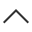

In [155]:
#pairs of each exchange
ex_pairs = {}
for ex in ccxt.exchanges:
    try:
        exchange = getattr(ccxt, ex)()
        markets = exchange.load_markets()
        pairs = list(markets.keys())
        ex_pairs[ex] = pairs
        print(ex, pairs)
    except Exception as e:
        print(e)


In [340]:
ex = "mercado"
start_dt = datetime.strptime('20100101', "%Y%m%d")
since = calendar.timegm(start_dt.utctimetuple())*1000

exchange = getattr(ccxt, ex)()
lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/BRL", timeframe="1d", since=since, limit=6_000)
#lista_ohlcv =exchange.fetchOHLCV(symbol="BTC/USD")
df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
df['Open'] = df['Open'].astype(np.float64)
df['High'] = df['High'].astype(np.float64)
df['Low'] = df['Low'].astype(np.float64)
df['Close'] = df['Close'].astype(np.float64)
df['Volume'] = df['Volume'].astype(np.float64)
df.set_index('Time', inplace=True)
print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")

mercado : 3751, 2013-06-11 21:00:00, 2023-09-17 21:00:00


<AxesSubplot:title={'center':'mercado BTC/BRL'}, xlabel='Time'>

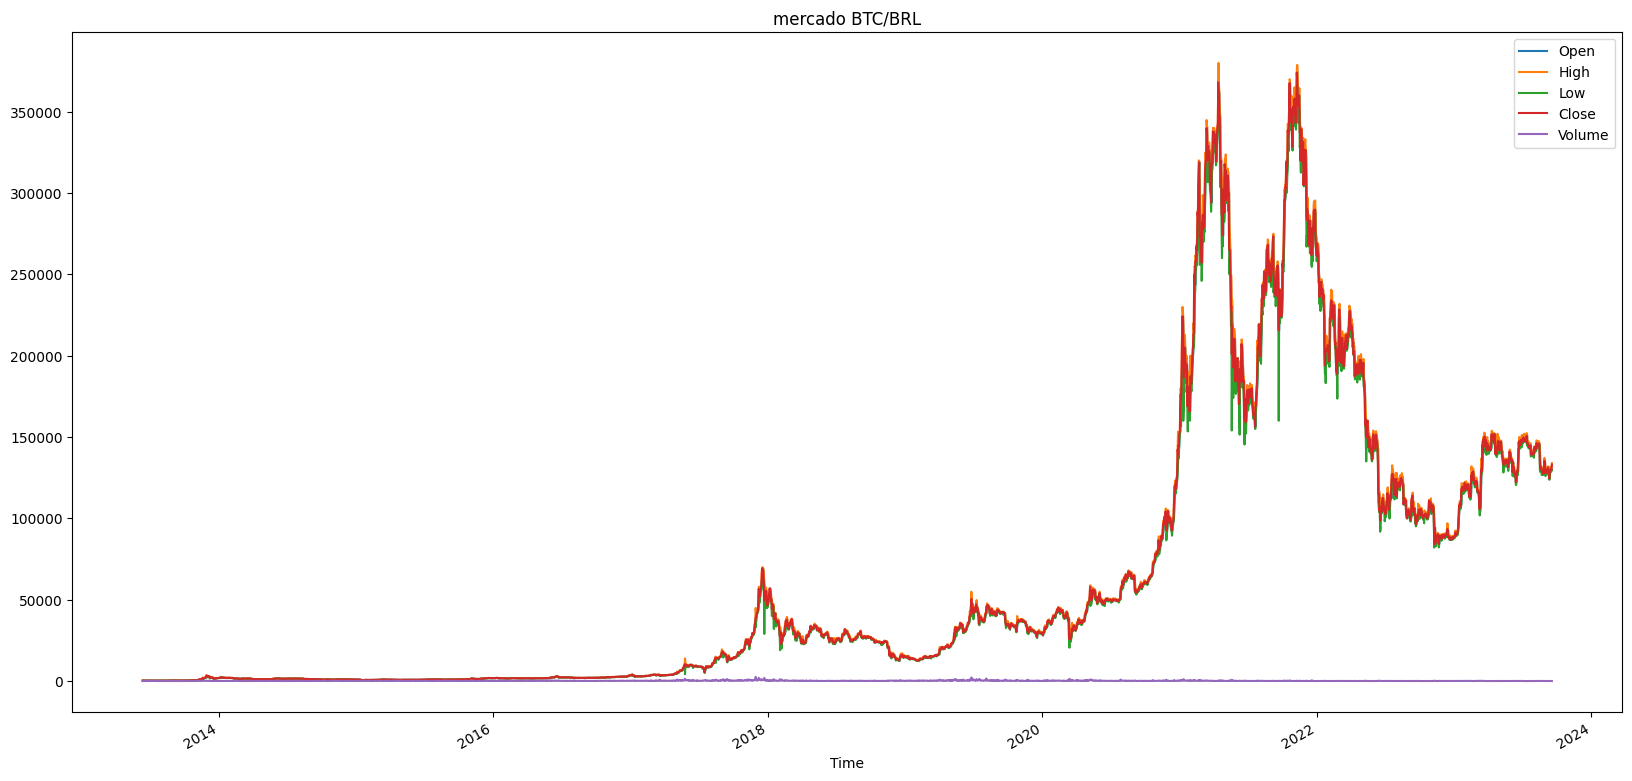

In [342]:
df.plot(figsize=(20,10), title=f"{ex} BTC/BRL")

In [ ]:
ex= "binance"
exchange = getattr(ccxt, ex)()
lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/USD", timeframe="1d", since=since, limit=6000)
# do what you want with this exchange
# pprint(dir(exchange))

df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
df['Open'] = df['Open'].astype(np.float64)
df['High'] = df['High'].astype(np.float64)
df['Low'] = df['Low'].astype(np.float64)
df['Close'] = df['Close'].astype(np.float64)
df['Volume'] = df['Volume'].astype(np.float64)
df.set_index('Time', inplace=True)
print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")

ace does not have market symbol BTC/USD
ace does not have market symbol BTC/USD
ace requires "apiKey" credential
ace requires "apiKey" credential
ace does not have market symbol BTC/USDC
ace does not have market symbol BTC/USDC
ace does not have market symbol BTC/DAI
ace does not have market symbol BTC/DAI
ace does not have market symbol BTC/TUSD
ace does not have market symbol BTC/TUSD
ace does not have market symbol BTC/BUSD
ace does not have market symbol BTC/BUSD
ace does not have market symbol BTC/USDD
ace does not have market symbol BTC/USDD
ace does not have market symbol BTC/USDP
ace does not have market symbol BTC/USDP
ace does not have market symbol BTC/GUSD
ace does not have market symbol BTC/GUSD
ace does not have market symbol BTC/USTC
ace does not have market symbol BTC/USTC
alpaca : 1162, 2020-04-08 02:00:00, 2023-07-13 02:00:00
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
alpaca : 1114, 2020-06-23 02:00:00, 2023-10-23 0
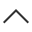
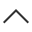
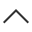
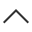
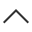
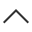
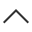
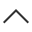
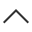
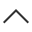
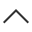
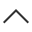
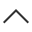
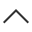
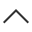
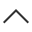
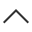
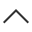
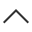
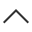

In [18]:
#função certa, ótima
start_dt = datetime.strptime('20090101', "%Y%m%d")
since = calendar.timegm(start_dt.utctimetuple())*1000

dict_exchanges = {}

for ex in ccxt.exchanges:
    for pair in list_pairs_btc:
        df_direct = pd.DataFrame()
        df_200 = pd.DataFrame()
        try:
            exchange = getattr(ccxt, ex)()
            lista_ohlcv = exchange.fetch_ohlcv(symbol=pair, timeframe="1d", since=since, limit=6000)
            # do what you want with this exchange
            # pprint(dir(exchange))

            df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
            df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
            df['Open'] = df['Open'].astype(np.float64)
            df['High'] = df['High'].astype(np.float64)
            df['Low'] = df['Low'].astype(np.float64)
            df['Close'] = df['Close'].astype(np.float64)
            df['Volume'] = df['Volume'].astype(np.float64)
            df.set_index('Time', inplace=True)
            print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")
            df_direct = df
            dict_exchanges[f"{ex}-{pair}"] = df_direct
            
        except Exception as e:
            print(e)
        
        # try the 200 day function
        try:
            df = get_ohlcv_200_days(exchange,pair)
            print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")
            df_200 = df

            # stay with the greater dataframe
            print("type(df_200): ", type(df_200))
            if (len(df_200) > len(df_direct)) & (type(df_200) == pd.core.frame.DataFrame):
                dict_exchanges[f"{ex}-{pair}"] = df_200
        except Exception as e:
            print(e)
        

In [31]:
dict_exchanges_copy["binance-BTC/USD"].index = dict_exchanges_copy["binance-BTC/USD"].index.date
dict_exchanges_copy["binance-BTC/USD"]

AttributeError: 'Index' object has no attribute 'date'

In [26]:
dict_exchanges_copy = dict_exchanges.copy()

In [71]:
#save the dict_exchanges to a pickle file
with open('dict_exchanges.pickle', 'wb') as handle:
    pickle.dump(dict_exchanges_copy, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
dict_exchanges_copy["alpaca-BTC/USD"].index[-1]

datetime.date(2023, 7, 13)

In [28]:
oldest_date =pd.to_datetime(dict_exchanges_copy["alpaca-BTC/USD"].index[0])
newest_date = pd.to_datetime(dict_exchanges_copy["alpaca-BTC/USD"].index[-1])
for pair in dict_exchanges_copy:
    #get the oldest date
    new_date = pd.to_datetime(dict_exchanges_copy[pair].index[0])
    if new_date < oldest_date:
        oldest_date = new_date
    if new_date> newest_date:
        newest_date = new_date
    #plt.stackplot(dict_exchanges_copy[pair].index, dict_exchanges_copy[pair]["Volume"]) 
oldest_date
newest_date
# plt.yscale('log')
# plt.show()


Timestamp('2023-07-15 00:00:00')

In [29]:
dict_exchanges_same_date_range = {}
#fill with 0 the dates that are not in the dataframe from oldest_date to the firstdate of the dataframe
for pair in dict_exchanges_copy:
    df = dict_exchanges_copy[pair]
    try:
        df_save = df["Volume"].reindex(pd.date_range(oldest_date, df.index[0], freq='D'), fill_value=0)
        #concatenate the two dataframes
        df_save = pd.concat([df_save, dict_exchanges_copy[pair]["Volume"]])
        #delete duplicated dates
        df_save = df_save[~df_save.index.duplicated(keep='first')]
    except Exception as e:
        print(e)

    try:
        df_save_2 = df["Volume"].reindex(pd.date_range(df.index[-1],newest_date, freq='D'), fill_value=0)
        #concatenate the two dataframes
        df_save_2 = pd.concat([df_save, df_save_2])
        #delete duplicated dates
        df_save_2 = df_save_2[~df_save_2.index.duplicated(keep='first')]

    except Exception as e:
        print(e)
    dict_exchanges_same_date_range[pair] = df_save_2

    try:
        #if there is missing dates, complete with 0
        if len(df_save_2) != len(pd.date_range(oldest_date,newest_date, freq='D')):
            df_save_2 = df_save_2.reindex(pd.date_range(oldest_date,newest_date, freq='D'), fill_value=0)
            #delete duplicated dates
            df_save_2 = df_save_2[~df_save_2.index.duplicated(keep='first')]
    except Exception as e:
        print(e)

dict_exchanges_same_date_range


/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/pandas/core/indexes/base.py:2023: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.is_unique


Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniquely valued Index objects
Reindexing only valid with uniq

{'alpaca-BTC/USD': 2011-08-17 00:00:00      0.00000
 2011-08-18 00:00:00      0.00000
 2011-08-19 00:00:00      0.00000
 2011-08-20 00:00:00      0.00000
 2011-08-21 00:00:00      0.00000
                          ...    
 2023-07-12              85.21626
 2023-07-13             158.39798
 2023-07-13 00:00:00    158.39798
 2023-07-14 00:00:00      0.00000
 2023-07-15 00:00:00      0.00000
 Name: Volume, Length: 4323, dtype: float64,
 'alpaca-BTC/USDT': 2011-08-17 00:00:00      0.00000
 2011-08-18 00:00:00      0.00000
 2011-08-19 00:00:00      0.00000
 2011-08-20 00:00:00      0.00000
 2011-08-21 00:00:00      0.00000
                          ...    
 2023-10-19             251.39173
 2023-10-20             213.56600
 2023-10-21             198.46092
 2023-10-22             205.67598
 2023-10-23             353.53376
 Name: Volume, Length: 4348, dtype: float64,
 'ascendex-BTC/USD': 2011-08-17 00:00:00    0.0000
 2011-08-18 00:00:00    0.0000
 2011-08-19 00:00:00    0.0000
 2011-08-20 

In [30]:
#ESSE È O QUE FUNCIONA
dict_test = {}
for pair in dict_exchanges_copy:
    df_save_2 = dict_exchanges_copy[pair].Volume
    try:
        #if there is missing dates, complete with 0
        if len(df_save_2) != len(pd.date_range(oldest_date,newest_date, freq='D')):
            df_save_2 = df_save_2.reindex(pd.date_range(oldest_date,newest_date, freq='D'), fill_value=0)
            #delete duplicated dates
            df_save_2 = df_save_2[~df_save_2.index.duplicated(keep='first')]
        dict_test[pair] = df_save_2
    except Exception as e:
        print(e)
dict_test

cannot reindex from a duplicate axis


{'alpaca-BTC/USD': 2011-08-17      0.00000
 2011-08-18      0.00000
 2011-08-19      0.00000
 2011-08-20      0.00000
 2011-08-21      0.00000
                 ...    
 2023-07-11     64.85446
 2023-07-12     85.21626
 2023-07-13    158.39798
 2023-07-14      0.00000
 2023-07-15      0.00000
 Freq: D, Name: Volume, Length: 4351, dtype: float64,
 'alpaca-BTC/USDT': 2011-08-17      0.00000
 2011-08-18      0.00000
 2011-08-19      0.00000
 2011-08-20      0.00000
 2011-08-21      0.00000
                 ...    
 2023-07-11    122.22525
 2023-07-12    207.71940
 2023-07-13    452.50987
 2023-07-14    330.12564
 2023-07-15     96.27035
 Freq: D, Name: Volume, Length: 4351, dtype: float64,
 'ascendex-BTC/USD': 2011-08-17     0.0000
 2011-08-18     0.0000
 2011-08-19     0.0000
 2011-08-20     0.0000
 2011-08-21     0.0000
                ...   
 2023-07-11    10.1971
 2023-07-12    10.1912
 2023-07-13    10.5844
 2023-07-14    10.1996
 2023-07-15    11.4874
 Freq: D, Name: Volume, Length: 

In [31]:
dict_volume_exchanges_concatenated = {}
dict_total_sum ={}
for pair in dict_test.keys():
    print(pair.split("-")[0])
    #Sum the volume of iqual name exchanges
    if pair.split("-")[0] not in ["a"]:
        try:
            dict_volume_exchanges_concatenated[pair.split("-")[0]] += dict_test[pair].values
            print(pair.split("-")[1])
        except Exception as e:
            dict_volume_exchanges_concatenated[pair.split("-")[0]] = dict_test[pair].values
            print(e)
        #Sum the total volume of all exchanges
        try:
            dict_total_sum["total"] += dict_test[pair].values
        except Exception as e:
            print(e)
            dict_total_sum["total"] = dict_test[pair].values


dict_volume_exchanges_concatenated

alpaca
'alpaca'
'total'
alpaca
BTC/USDT
ascendex
'ascendex'
ascendex
BTC/USDT
bequant
'bequant'
bequant
BTC/USDT
bequant
BTC/USDC
bequant
BTC/DAI
bequant
BTC/TUSD
bequant
BTC/BUSD
bequant
BTC/USDP
bigone
'bigone'
binance
'binance'
binance
BTC/USDT
binance
BTC/USDC
binance
BTC/DAI
binance
BTC/TUSD
binance
BTC/BUSD
binance
BTC/USDP
binancecoinm
'binancecoinm'
binanceus
'binanceus'
binanceus
BTC/USDT
binanceus
BTC/USDC
binanceus
BTC/DAI
binanceus
BTC/BUSD
binanceusdm
'binanceusdm'
binanceusdm
BTC/BUSD
bitbay
'bitbay'
bitbay
BTC/USDT
bitbay
BTC/USDC
bitcoincom
'bitcoincom'
bitcoincom
BTC/USDC
bitcoincom
BTC/TUSD
bitcoincom
BTC/BUSD
bitcoincom
BTC/USDD
bitcoincom
BTC/USDP
bitfinex
'bitfinex'
bitfinex
BTC/USDT
bitfinex2
'bitfinex2'
bitfinex2
BTC/USDT
bitforex
'bitforex'
bitmart
'bitmart'
bitmart
BTC/USDC
bitmart
BTC/DAI
bitmart
BTC/TUSD
bitmex
'bitmex'
bitopro
'bitopro'
bitpanda
'bitpanda'
bitpanda
BTC/USDC
bitrue
'bitrue'
bitrue
BTC/USDC
bitrue
BTC/BUSD
bitso
'bitso'
bitso
BTC/USDT
bitstamp

{'alpaca': array([4.89908260e-01, 1.92657814e+00, 8.54700900e-02, ...,
        1.54445473e+06, 4.98567452e+05, 6.70560881e+05]),
 'ascendex': array([  0.     ,   0.     ,   0.     , ..., 320.09657, 272.27691,
        271.07024]),
 'bequant': array([   0.     ,    0.     ,    0.     , ..., 4370.26721, 1414.34847,
        1758.16555]),
 'bigone': array([   0.      ,    0.      ,    0.      , ..., 1803.028172,
         417.905799,  467.906784]),
 'binance': array([    0.        ,     0.        ,     0.        , ...,
        96195.30568187, 14588.34135344, 25886.07441998]),
 'binancecoinm': array([    0.        ,     0.        ,     0.        , ...,
        90417.15496187, 13145.00577344, 24266.96086998]),
 'binanceus': array([  0.     ,   0.     ,   0.     , ..., 453.66826,  81.60854,
        135.47076]),
 'binanceusdm': array([     0.   ,      0.   ,      0.   , ..., 585435.38 , 118422.962,
        184963.133]),
 'bitbay': array([0.        , 0.        , 0.        , ..., 2.82500963, 0.205

In [ ]:
#count the total non zero values of dict_volume_exchanges_concatenated[ex]
dict_total_non_zero = {}
for ex in dict_volume_exchanges_concatenated.keys():
    dict_total_non_zero[ex] = len(dict_volume_exchanges_concatenated[ex][dict_volume_exchanges_concatenated[ex]>0])

In [36]:
#check if the average of the daily volume of each exchange is greater than US20k
dict_volume_exchanges_concatenated_svar = {}
for ex in dict_volume_exchanges_concatenated.keys():
    #delete item if the average is less than 
    if dict_volume_exchanges_concatenated[ex].sum()/len(dict_volume_exchanges_concatenated[ex][dict_volume_exchanges_concatenated[ex]>0]) > 4_000:
        #print(ex, dict_volume_exchanges_concatenated[ex].sum()/len(dict_volume_exchanges_concatenated[ex][dict_volume_exchanges_concatenated[ex]>0]))
        dict_volume_exchanges_concatenated_svar[ex] = dict_volume_exchanges_concatenated[ex]
list_exchanges_delete = ["alpaca", "lbank2", "okex5", "okex", "huobipro", "mexc3", "bitfinex2"]
for ex in list_exchanges_delete:
    try:
        del dict_volume_exchanges_concatenated_svar[ex]
    except Exception as e:
        print(e)
for ex in dict_volume_exchanges_concatenated_svar.keys():
    print(ex, dict_volume_exchanges_concatenated_svar[ex].sum()/len(dict_volume_exchanges_concatenated_svar[ex][dict_volume_exchanges_concatenated_svar[ex]>0]))

'alpaca'
'lbank2'
'okex5'
'okex'
'huobipro'
'mexc3'
bigone 8399.846762566938
binance 94560.62065247224
binancecoinm 105412.2379868892
binanceusdm 412374.98184303974
bitfinex 17499.342612931963
bitforex 5691.13312255489
bitrue 6494.97823272388
bitstamp 8327.897906447266
bybit 5878.697141082655
coinbaseprime 15336.361823316749
coinbasepro 15336.361823316749
cryptocom 4390.371360248756
currencycom 2042210.6611001964
digifinex 21841.271991325193
huobi 23505.2245615661
kraken 4044.4938540853946
kucoin 4765.517712951587
lbank 20722.480755611563
mexc 17439.82061020533
okx 22316.747090600675
phemex 6034.588732196725
poloniex 8297.631932927501
tokocrypto 76363.79473949074
whitebit 10324.249756457497
woo 133253.67154217113


In [69]:
data = dict_volume_exchanges_concatenated_svar["bitfinex"]
index = dict_test["alpaca-BTC/USD"].index

    # Create the DataFrame
df = pd.DataFrame(data, index=index)
df["Daily Volume"] = df[0]
del df[0]
#rename the columns without name to date
#df.columns.name = 'Date'
df.index.name = 'Date'
#save the df in a csv file

#find the fist date that the volume is greater than 0
df = df[df.index>"2013-03-30"]
df.to_csv("df_bitfinex_volume.csv")
df

Daily Volume
Date                    
2013-03-31   5224.401313
2013-04-01   8376.527478
2013-04-02  12996.245072
2013-04-03   6981.668305
2013-04-04   5234.882203
...                  ...
2023-07-11   1636.401373
2023-07-12   3763.115501
2023-07-13   2982.608992
2023-07-14    638.169886
2023-07-15    635.434537

[3759 rows x 1 columns]

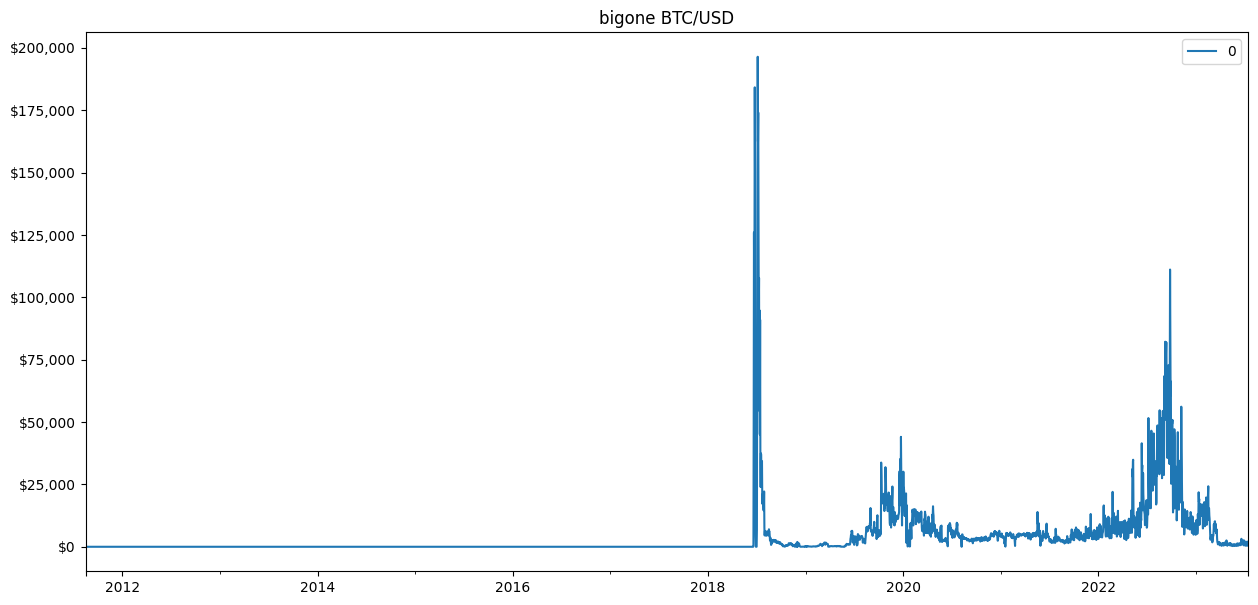

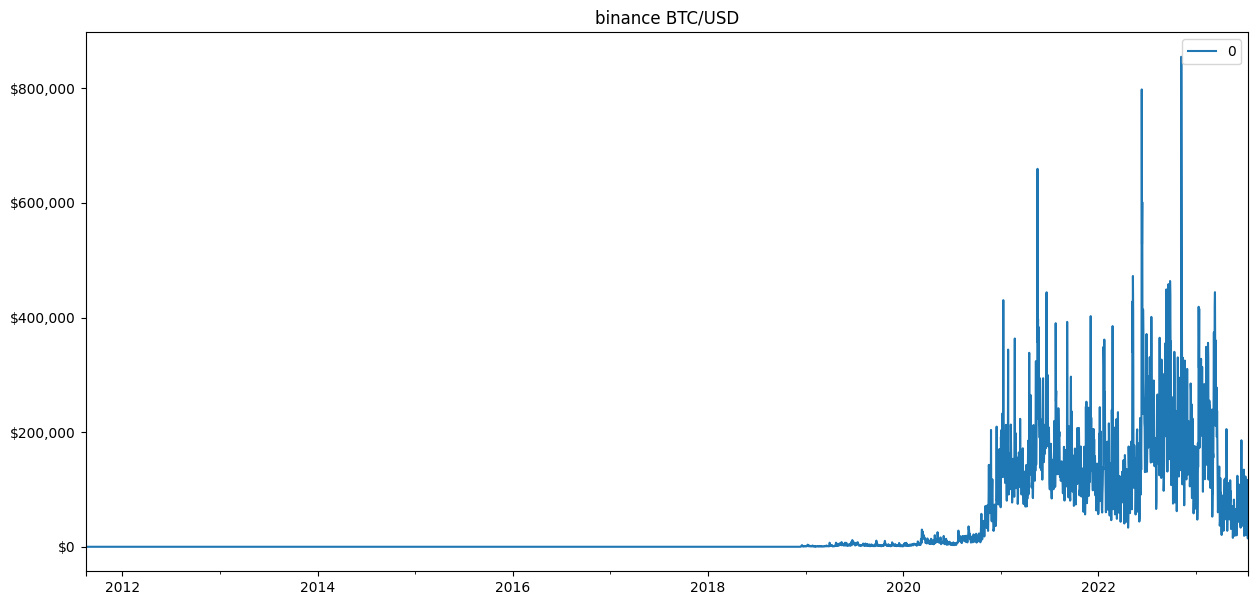

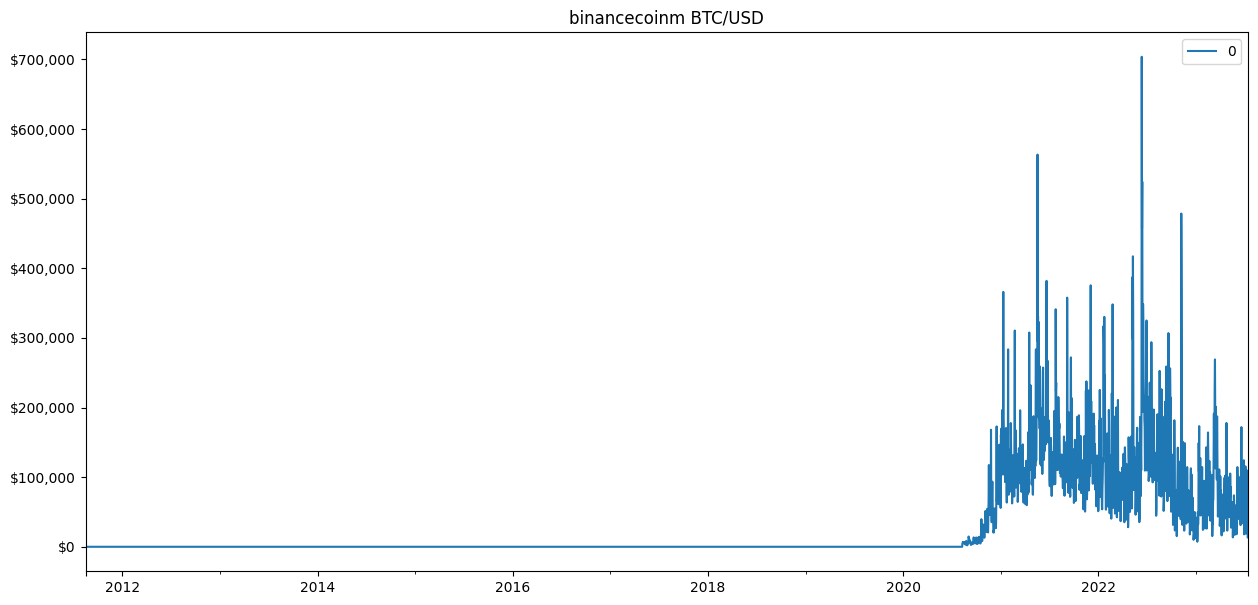

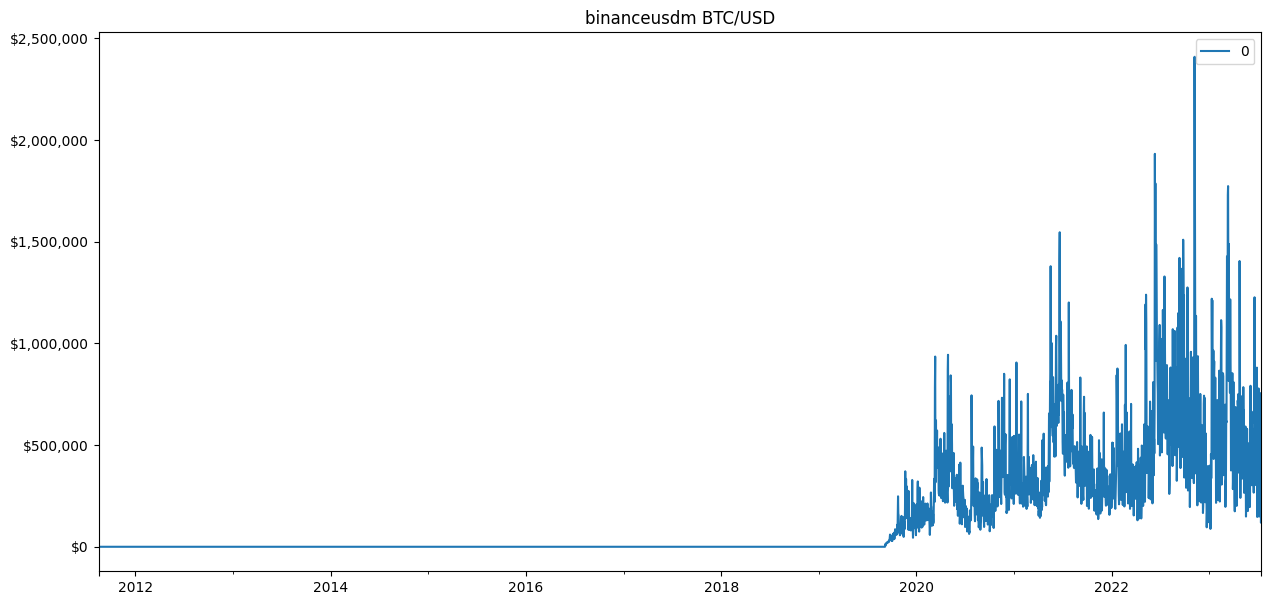

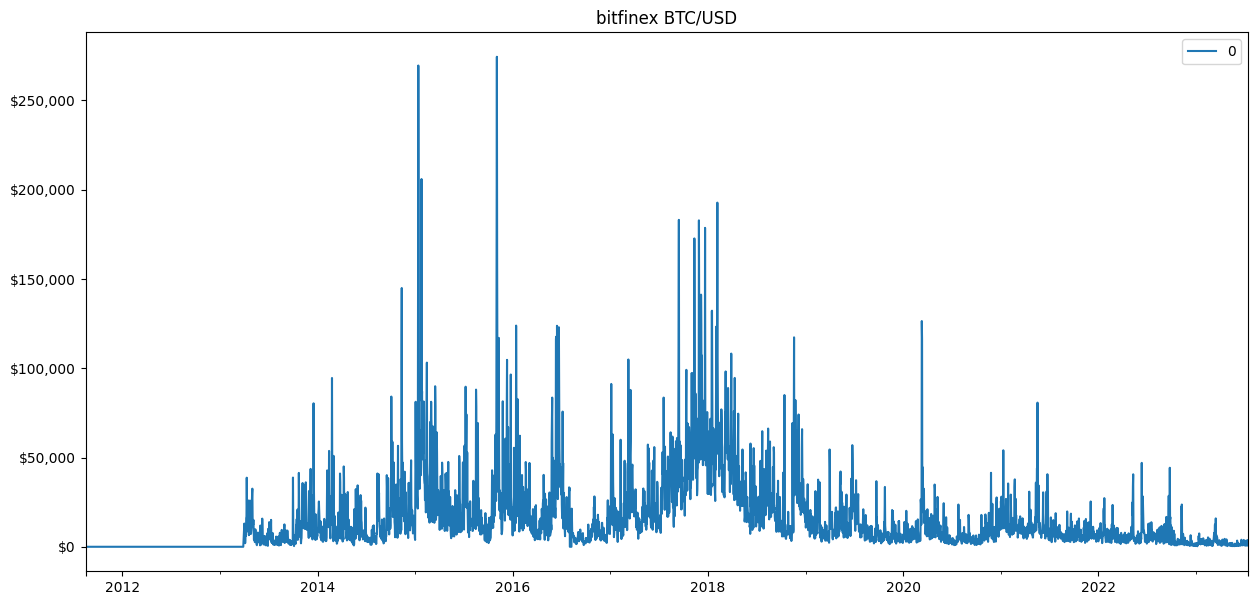

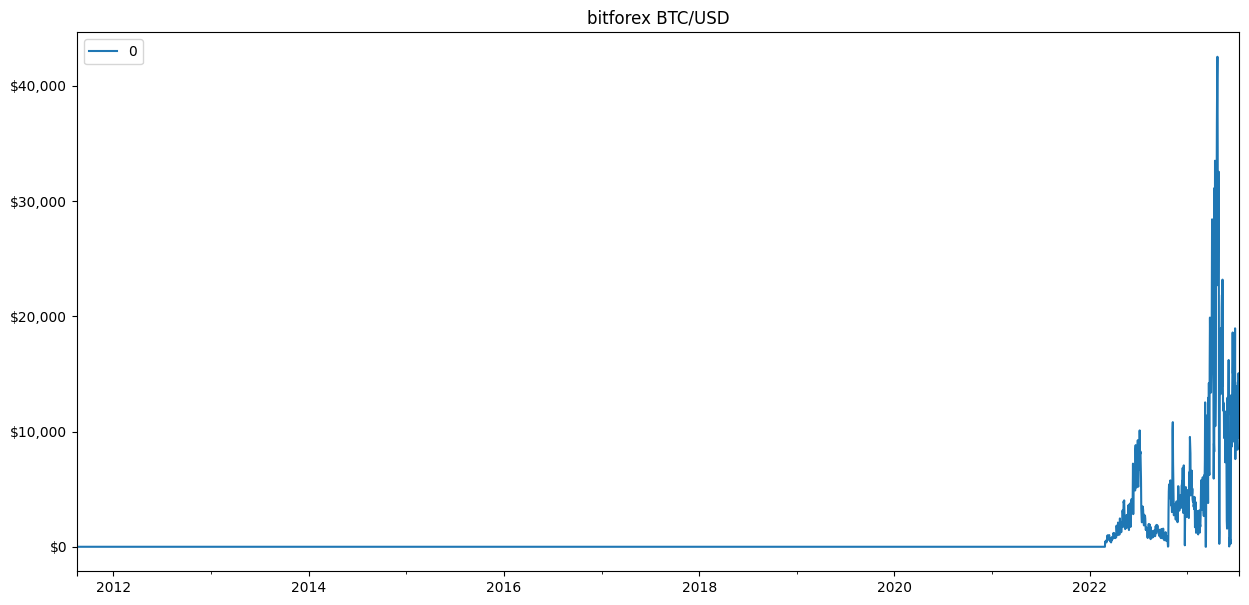

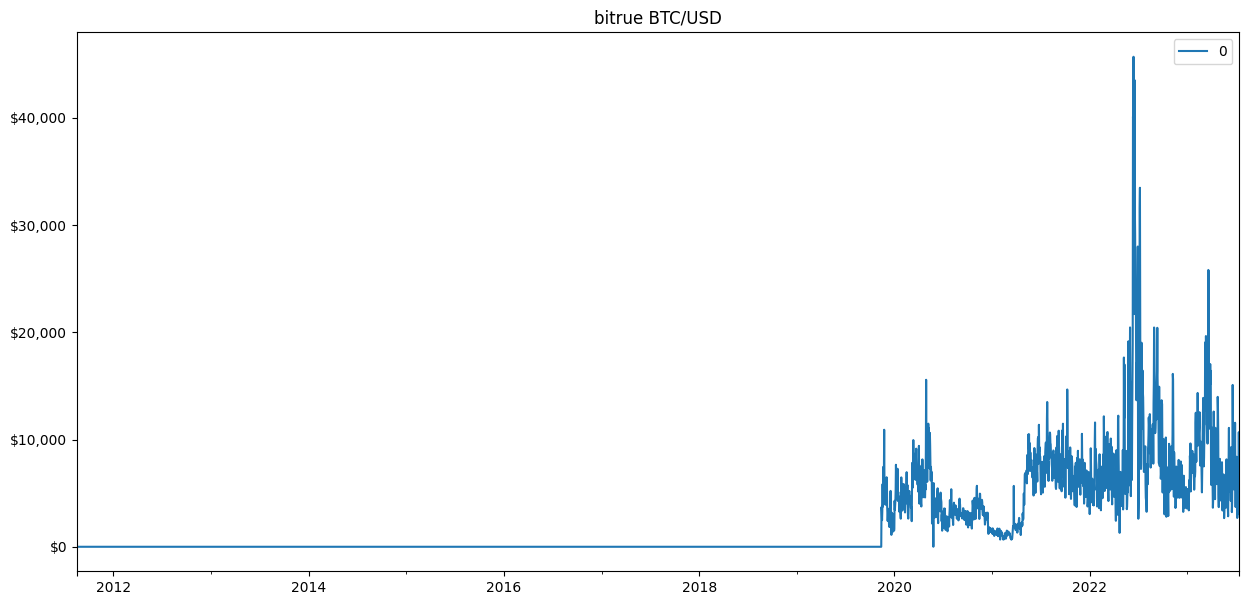

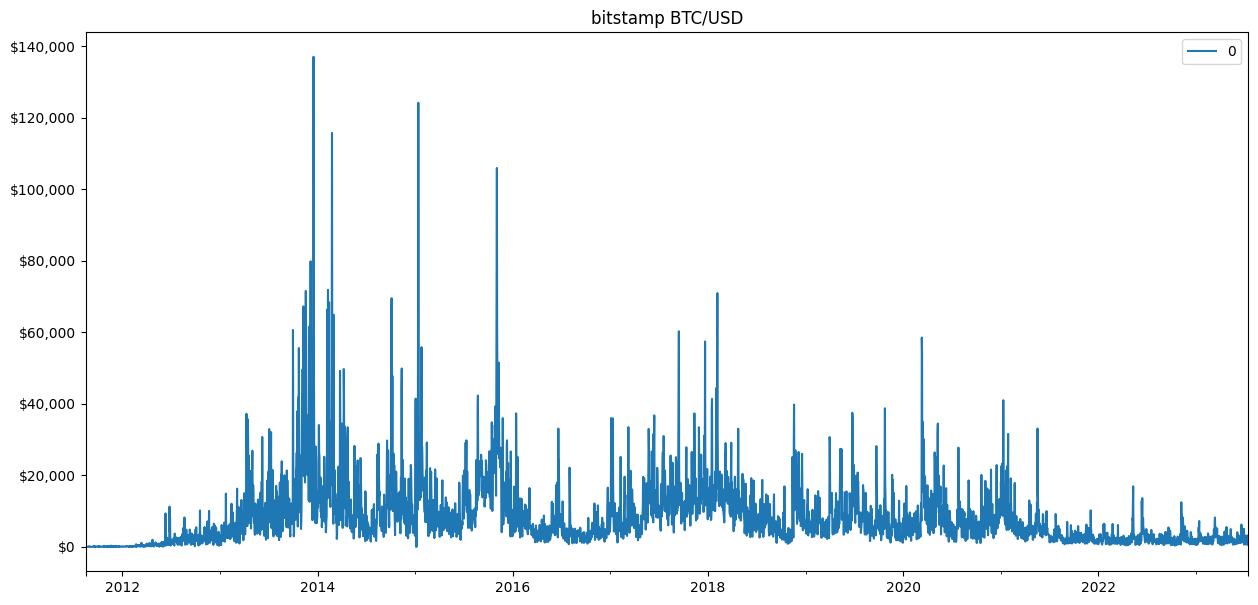

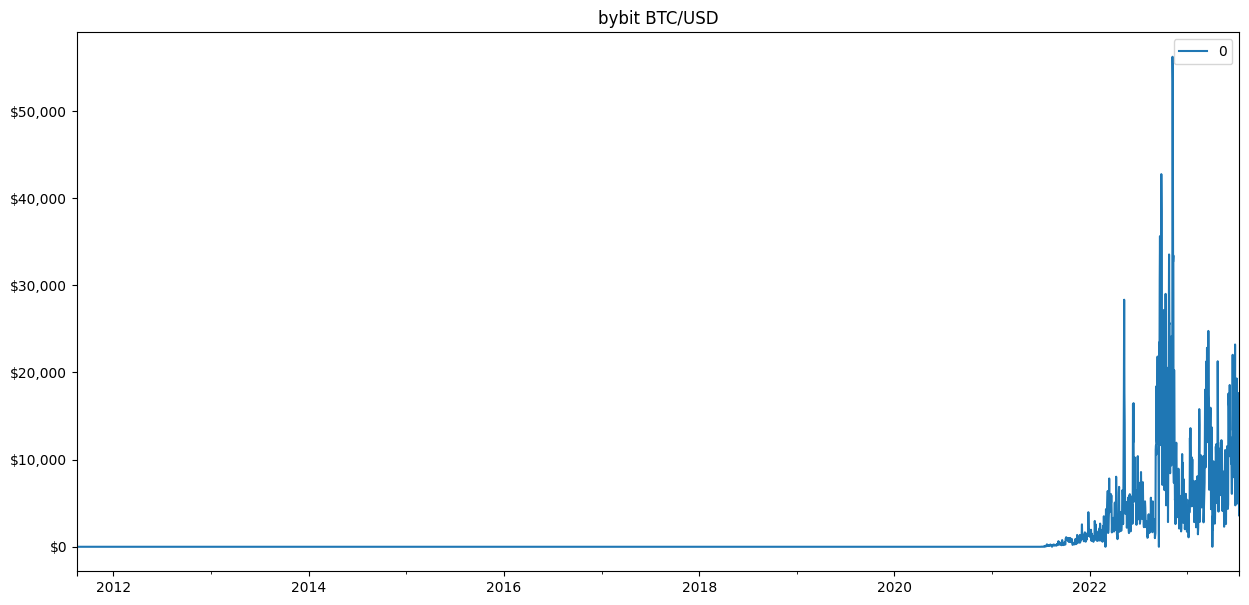

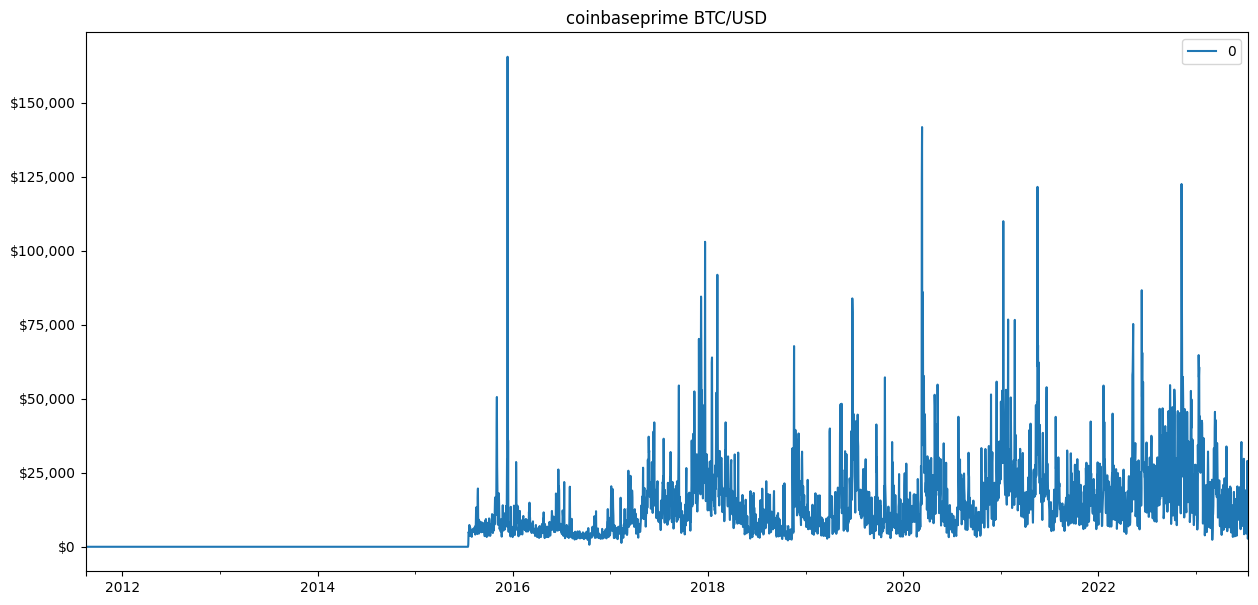

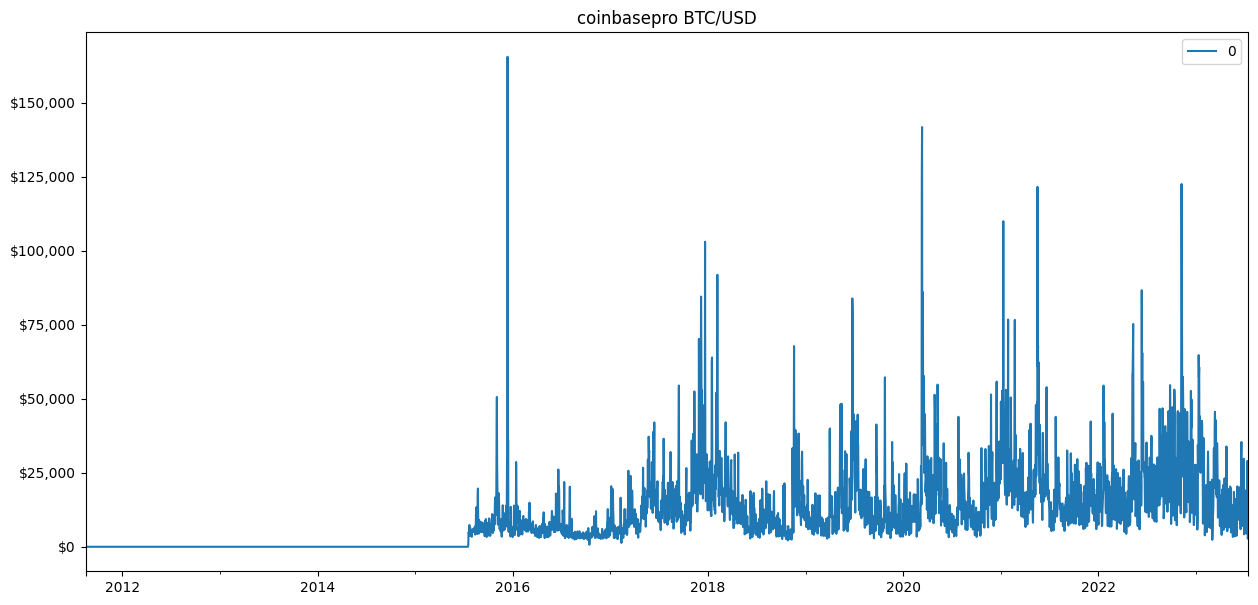

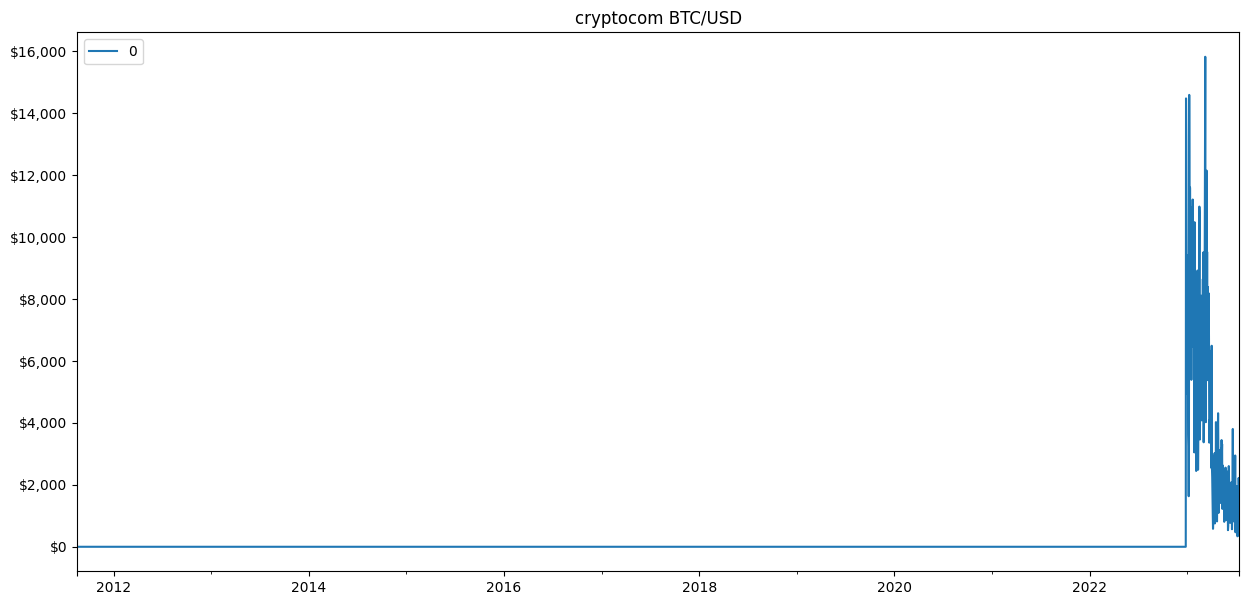

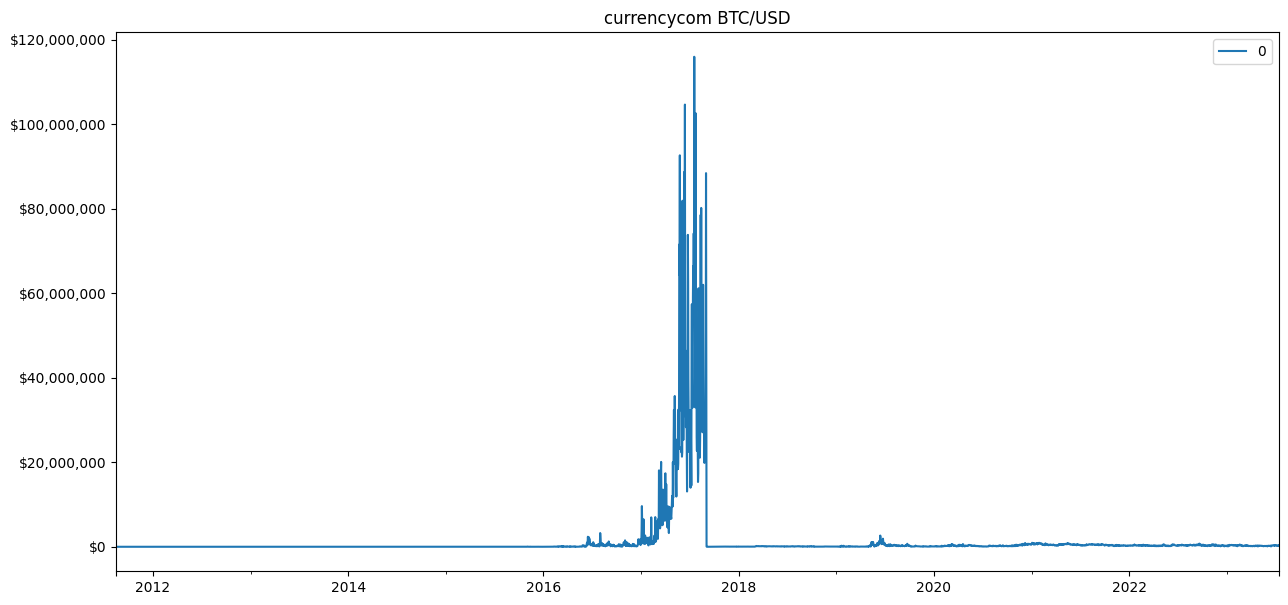

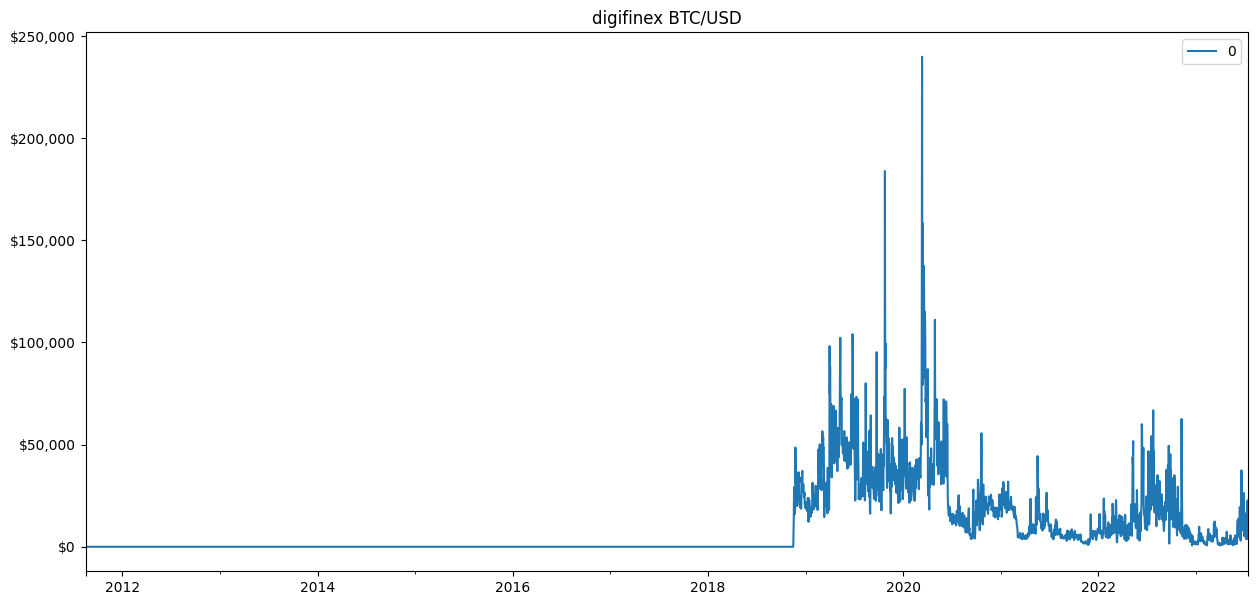

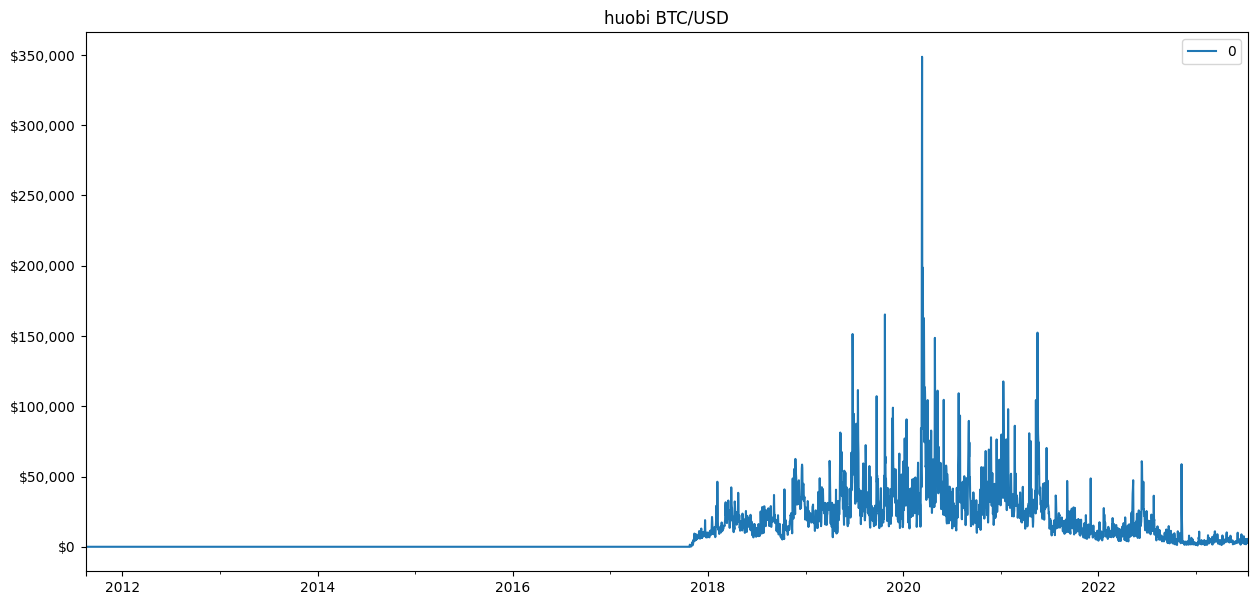

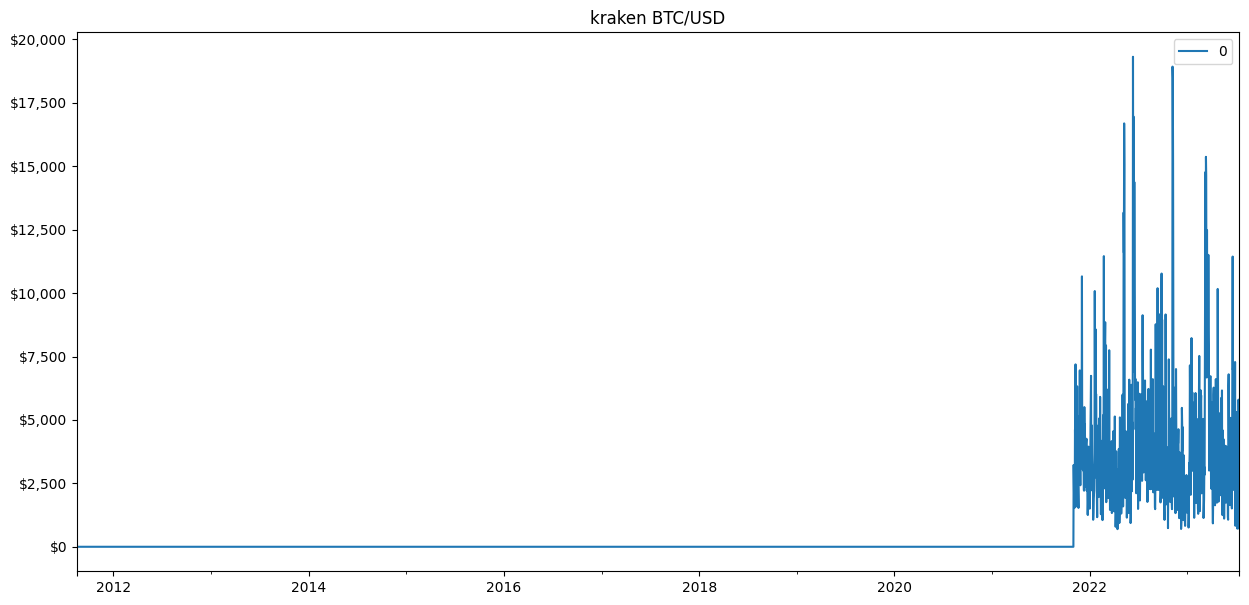

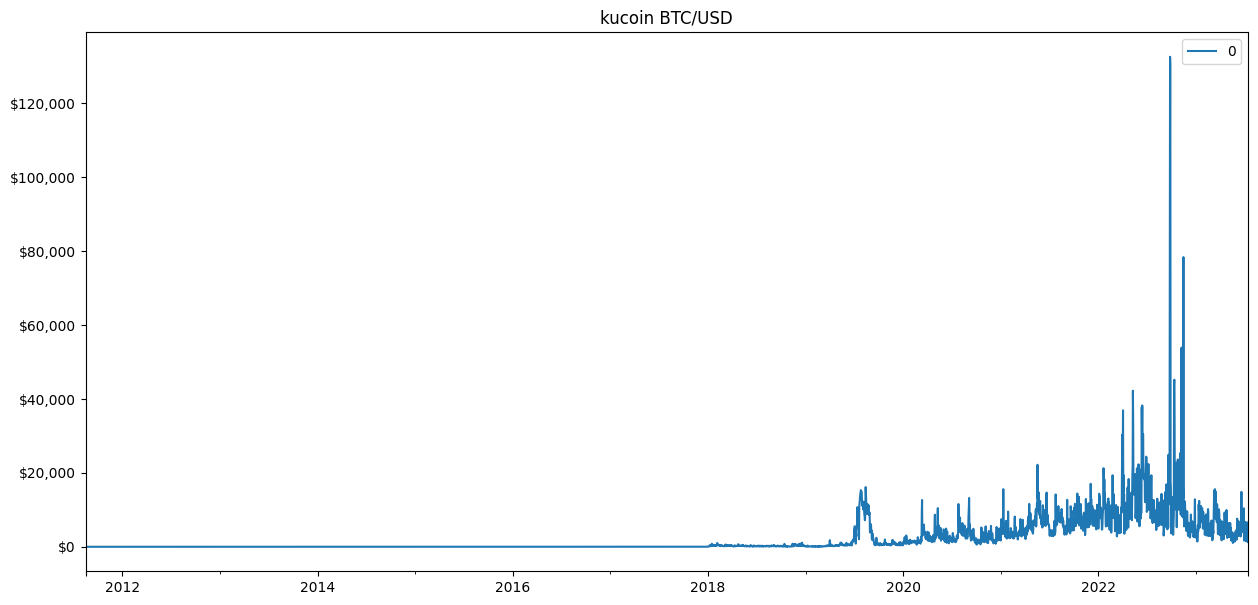

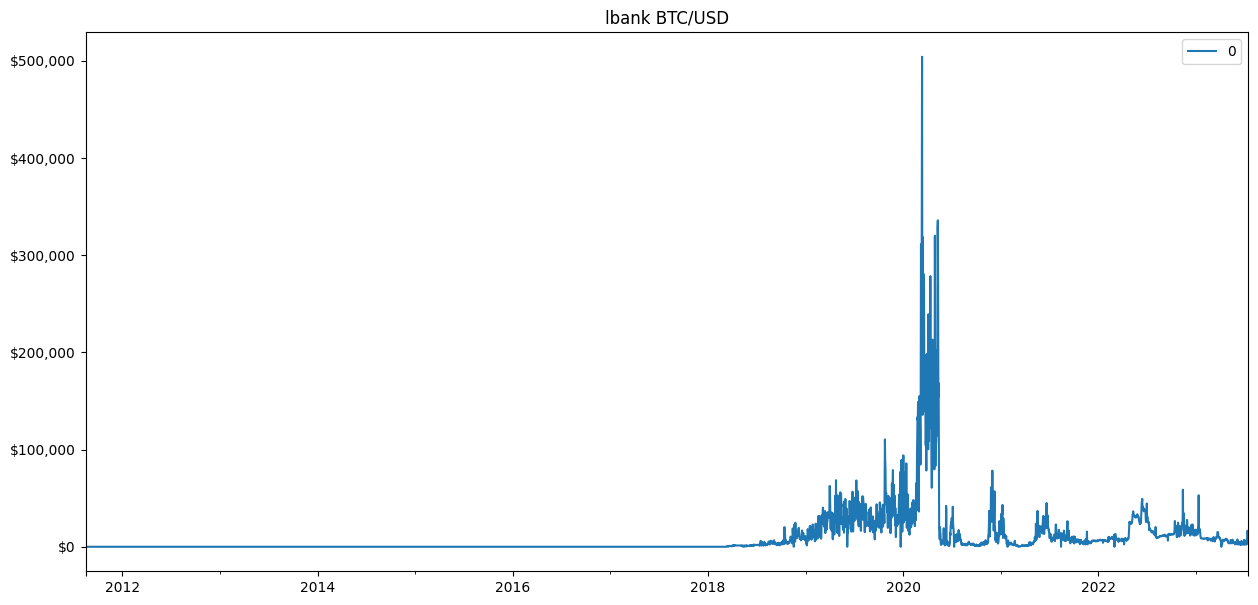

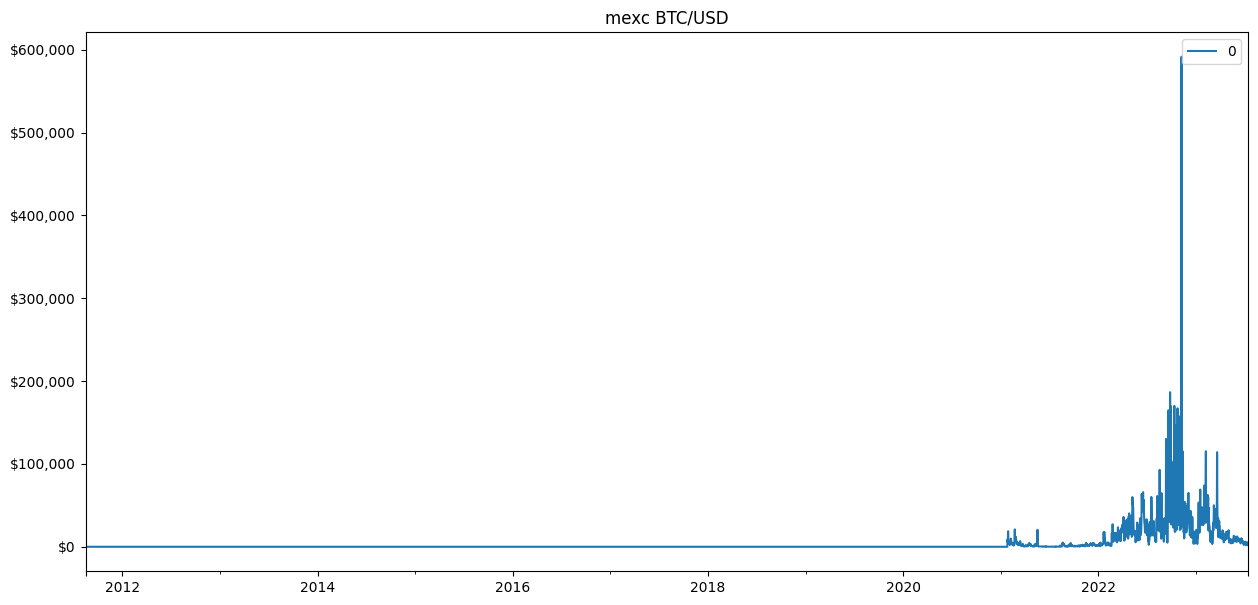

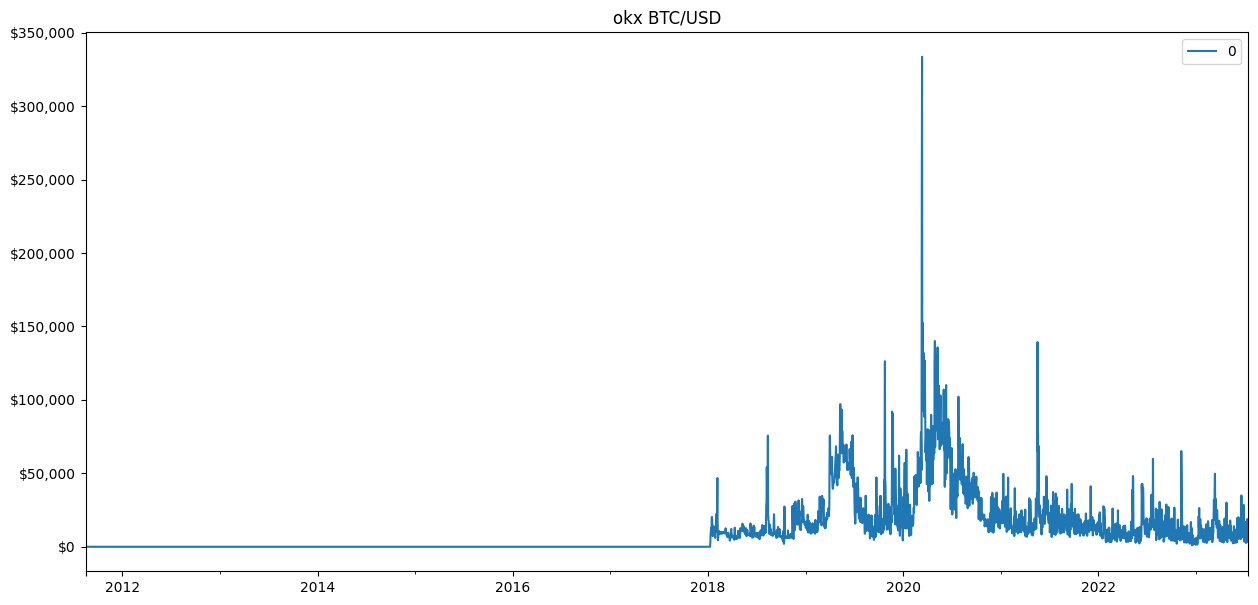

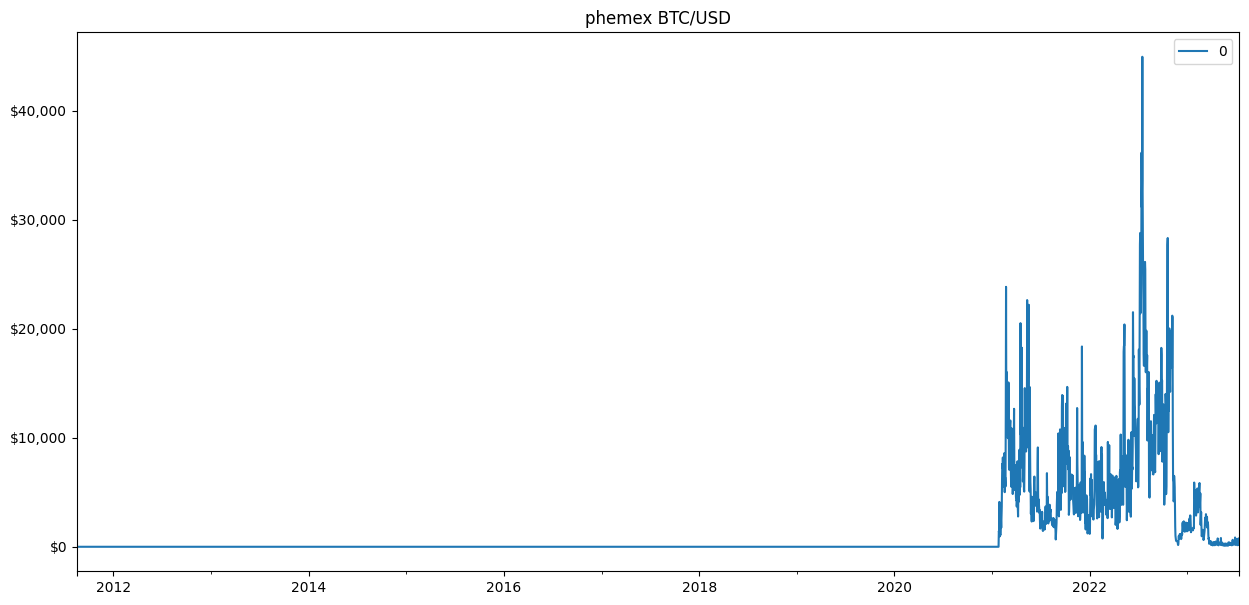

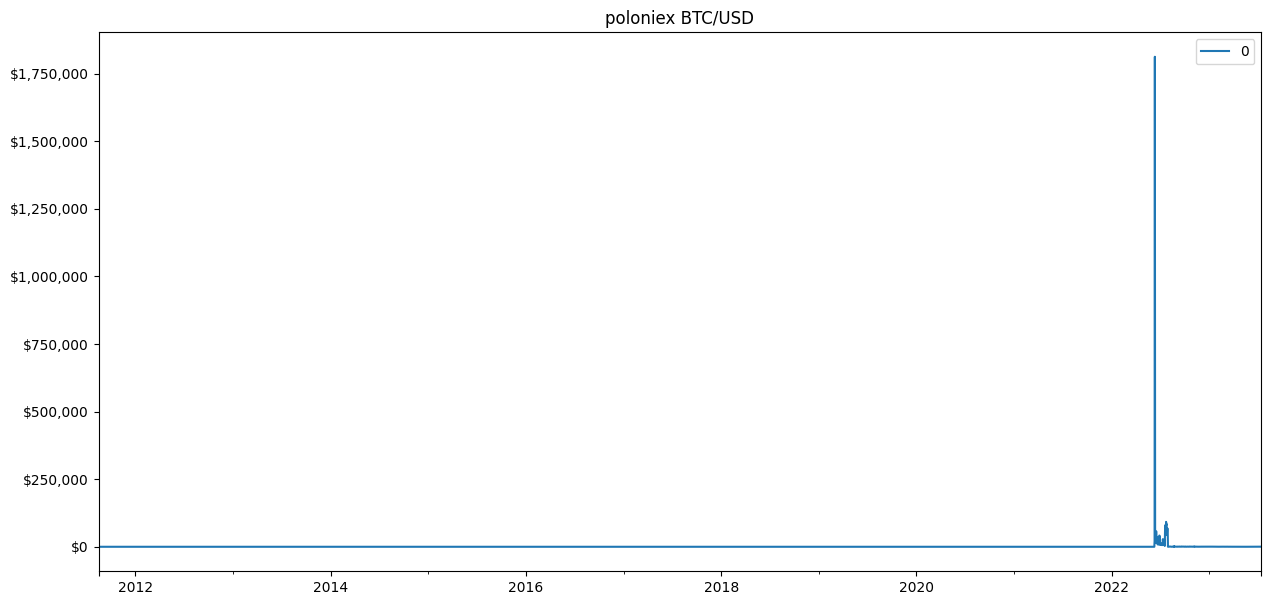

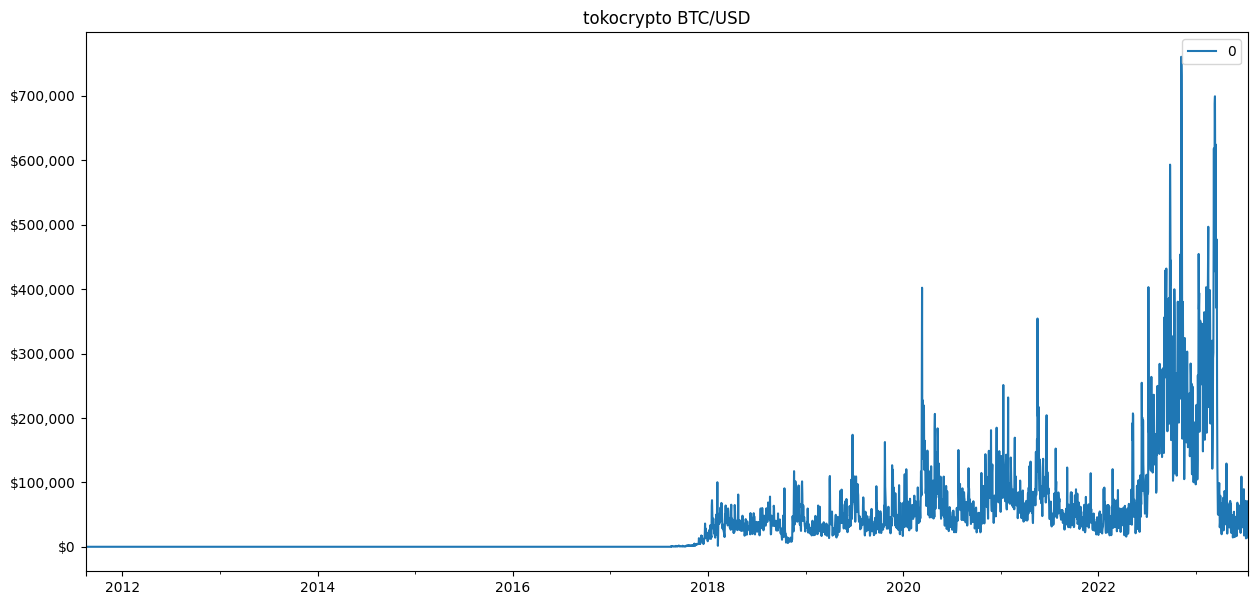

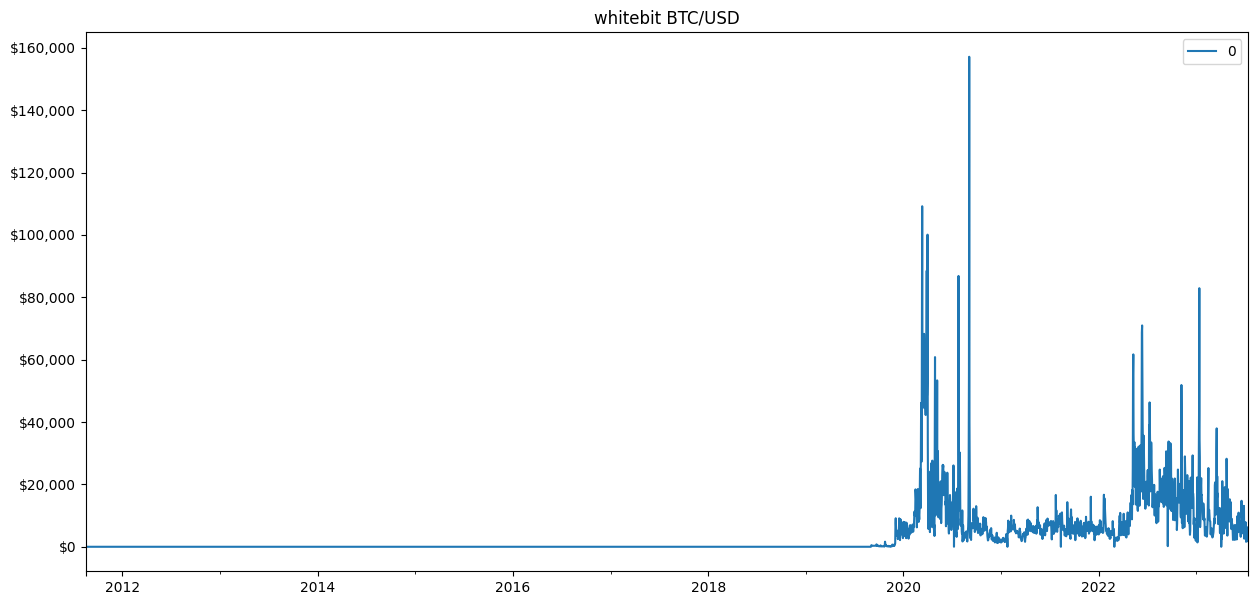

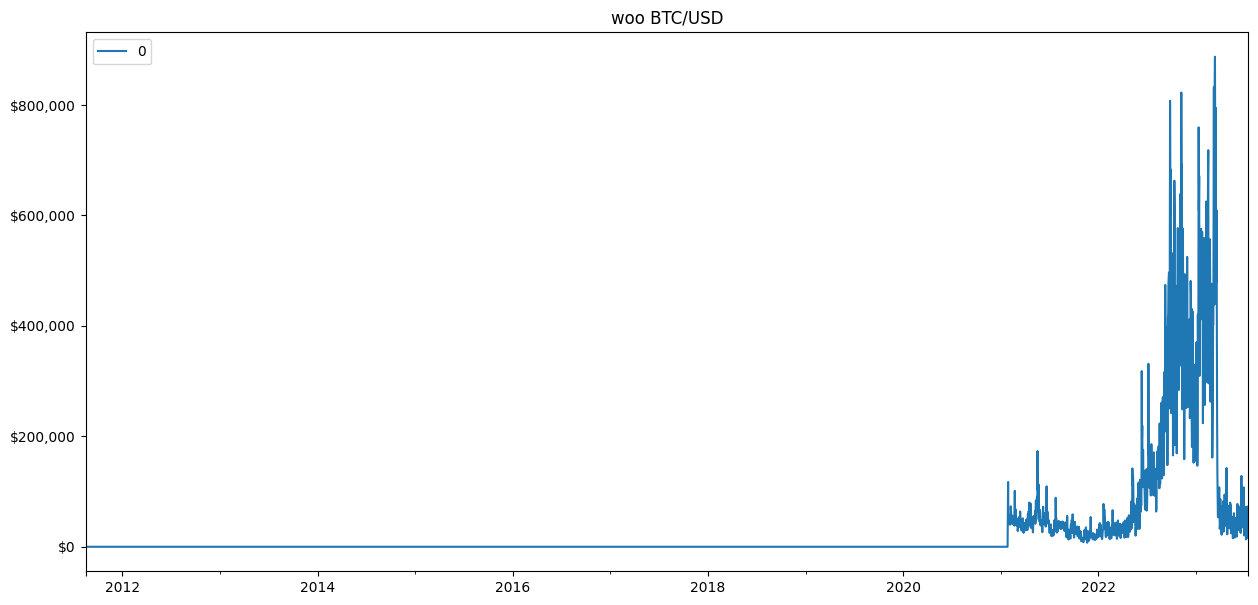

In [37]:
# Replace 'USD' with your currency symbol if needed
currency_symbol = '$'
dict_volume_exchanges_concatenated = dict_volume_exchanges_concatenated_svar
for ex in dict_volume_exchanges_concatenated.keys():
    data = dict_volume_exchanges_concatenated[ex]
    index = dict_test["alpaca-BTC/USD"].index

    # Create the DataFrame
    df = pd.DataFrame(data, index=index)

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 7))
    df.plot(ax=ax, title=f"{ex} BTC/USD")

    # Format the y-axis labels as currency
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{currency_symbol}{x:,.0f}"))

    plt.show()


/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


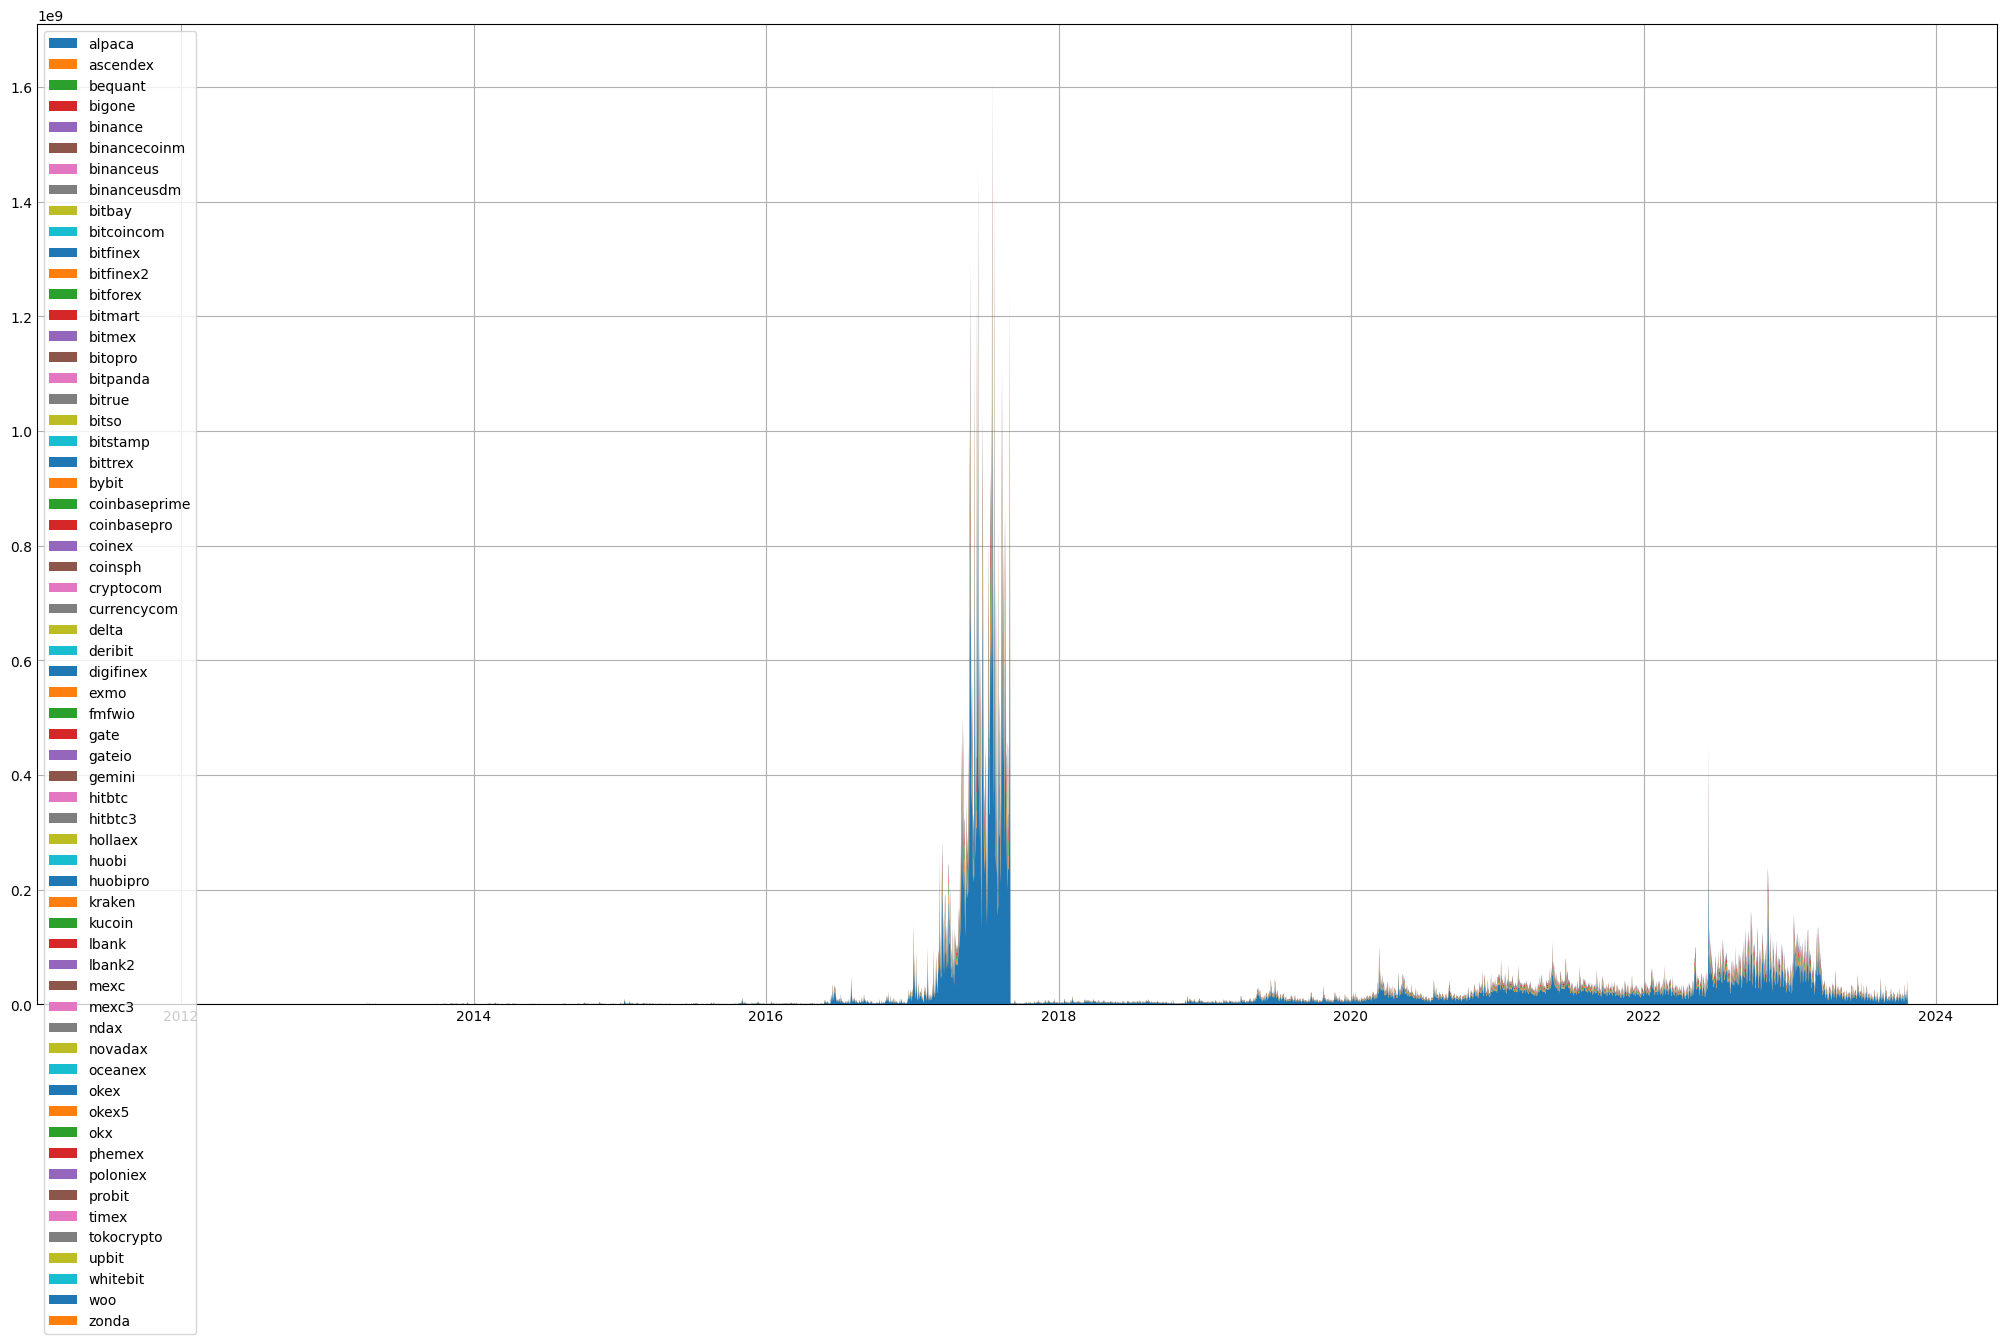

In [193]:
dict_exchanges_same_date_range
list_pairs_btc
x = dict_test["binance-BTC/USD"].index
#y = np.vstack([dict_volume_exchanges_concatenated[pair].values for pair in dict_volume_exchanges_concatenated])
y = np.vstack(dict_volume_exchanges_concatenated.values())
fig, ax = plt.subplots(figsize=(20, 10))

labels = dict_volume_exchanges_concatenated.keys()
ax.stackplot(x, y, labels=labels)
ax.legend(loc='upper left')
#y axis in log scale

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

<AxesSubplot:>

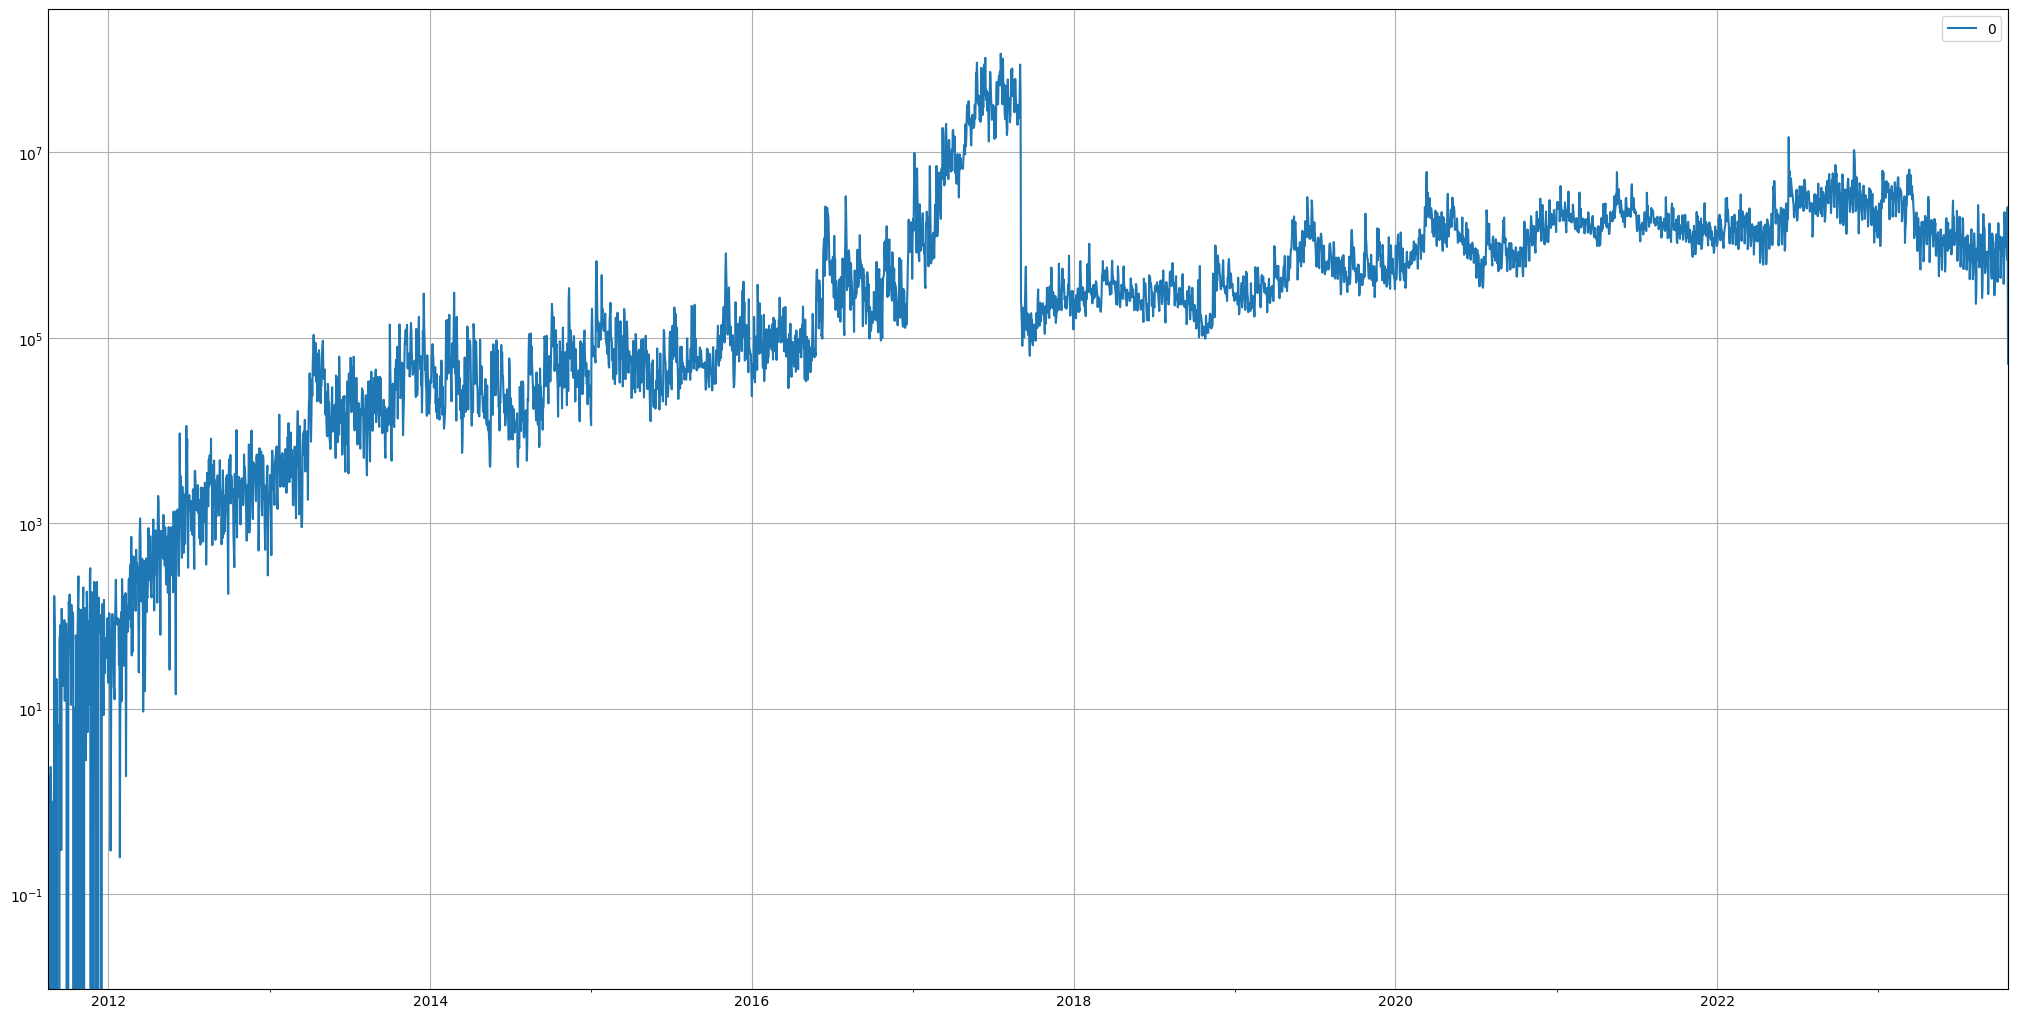

In [170]:
pd.DataFrame(dict_total_sum["total"], index=dict_volume_exchanges_concatenated["alpaca"].index).plot(figsize=(20,10), logy=True)

In [41]:

df_volume

Empty DataFrame
Columns: []
Index: []

In [382]:
#dict_exchanges_copy = dict_exchanges.copy()
dict_exchanges = dict_exchanges_copy.copy()

In [388]:

#delete the bittrex and ndax exchanges (error in data)
del dict_exchanges['bittrex']
del dict_exchanges['binancecoinm']
del dict_exchanges['ndax']
del dict_exchanges['currencycom']
del dict_exchanges['bitfinex2'] #repeted data from bitfinex
del dict_exchanges["coinbasepro"] #repeted data from coinbaseprime
dict_exchanges

{'alpaca':                          Open      High       Low     Close     Volume
 Time                                                                  
 2020-04-08 02:00:00   7314.00   7314.00   7314.00   7314.00    0.00010
 2020-04-14 02:00:00   7101.50   7101.50   7100.00   7100.00    0.00020
 2020-04-22 02:00:00   7118.50   7118.50   7118.50   7118.50    0.00010
 2020-04-28 02:00:00   7748.50   7836.00   7748.50   7836.00    0.08400
 2020-04-30 02:00:00   8829.00   8829.00   8653.00   8653.00    0.01340
 ...                       ...       ...       ...       ...        ...
 2023-07-09 02:00:00  27062.82  28040.26  27062.82  27543.55   70.34345
 2023-07-10 02:00:00  27543.55  28100.00  27031.27  27123.35  101.95629
 2023-07-11 02:00:00  27184.97  27469.53  26900.00  26945.00   64.85446
 2023-07-12 02:00:00  26945.00  27500.01  26600.00  26960.18   85.21626
 2023-07-13 02:00:00  26960.19  27400.00  24900.00  25073.21  158.39798
 
 [1162 rows x 5 columns],
 'ascendex':              

In [389]:
#delete the exchanges that have less than 365 days of data (one year)
for ex in list(dict_exchanges.keys()):
    if len(dict_exchanges[ex]) < 365:
        del dict_exchanges[ex]
len(dict_exchanges.keys())

14

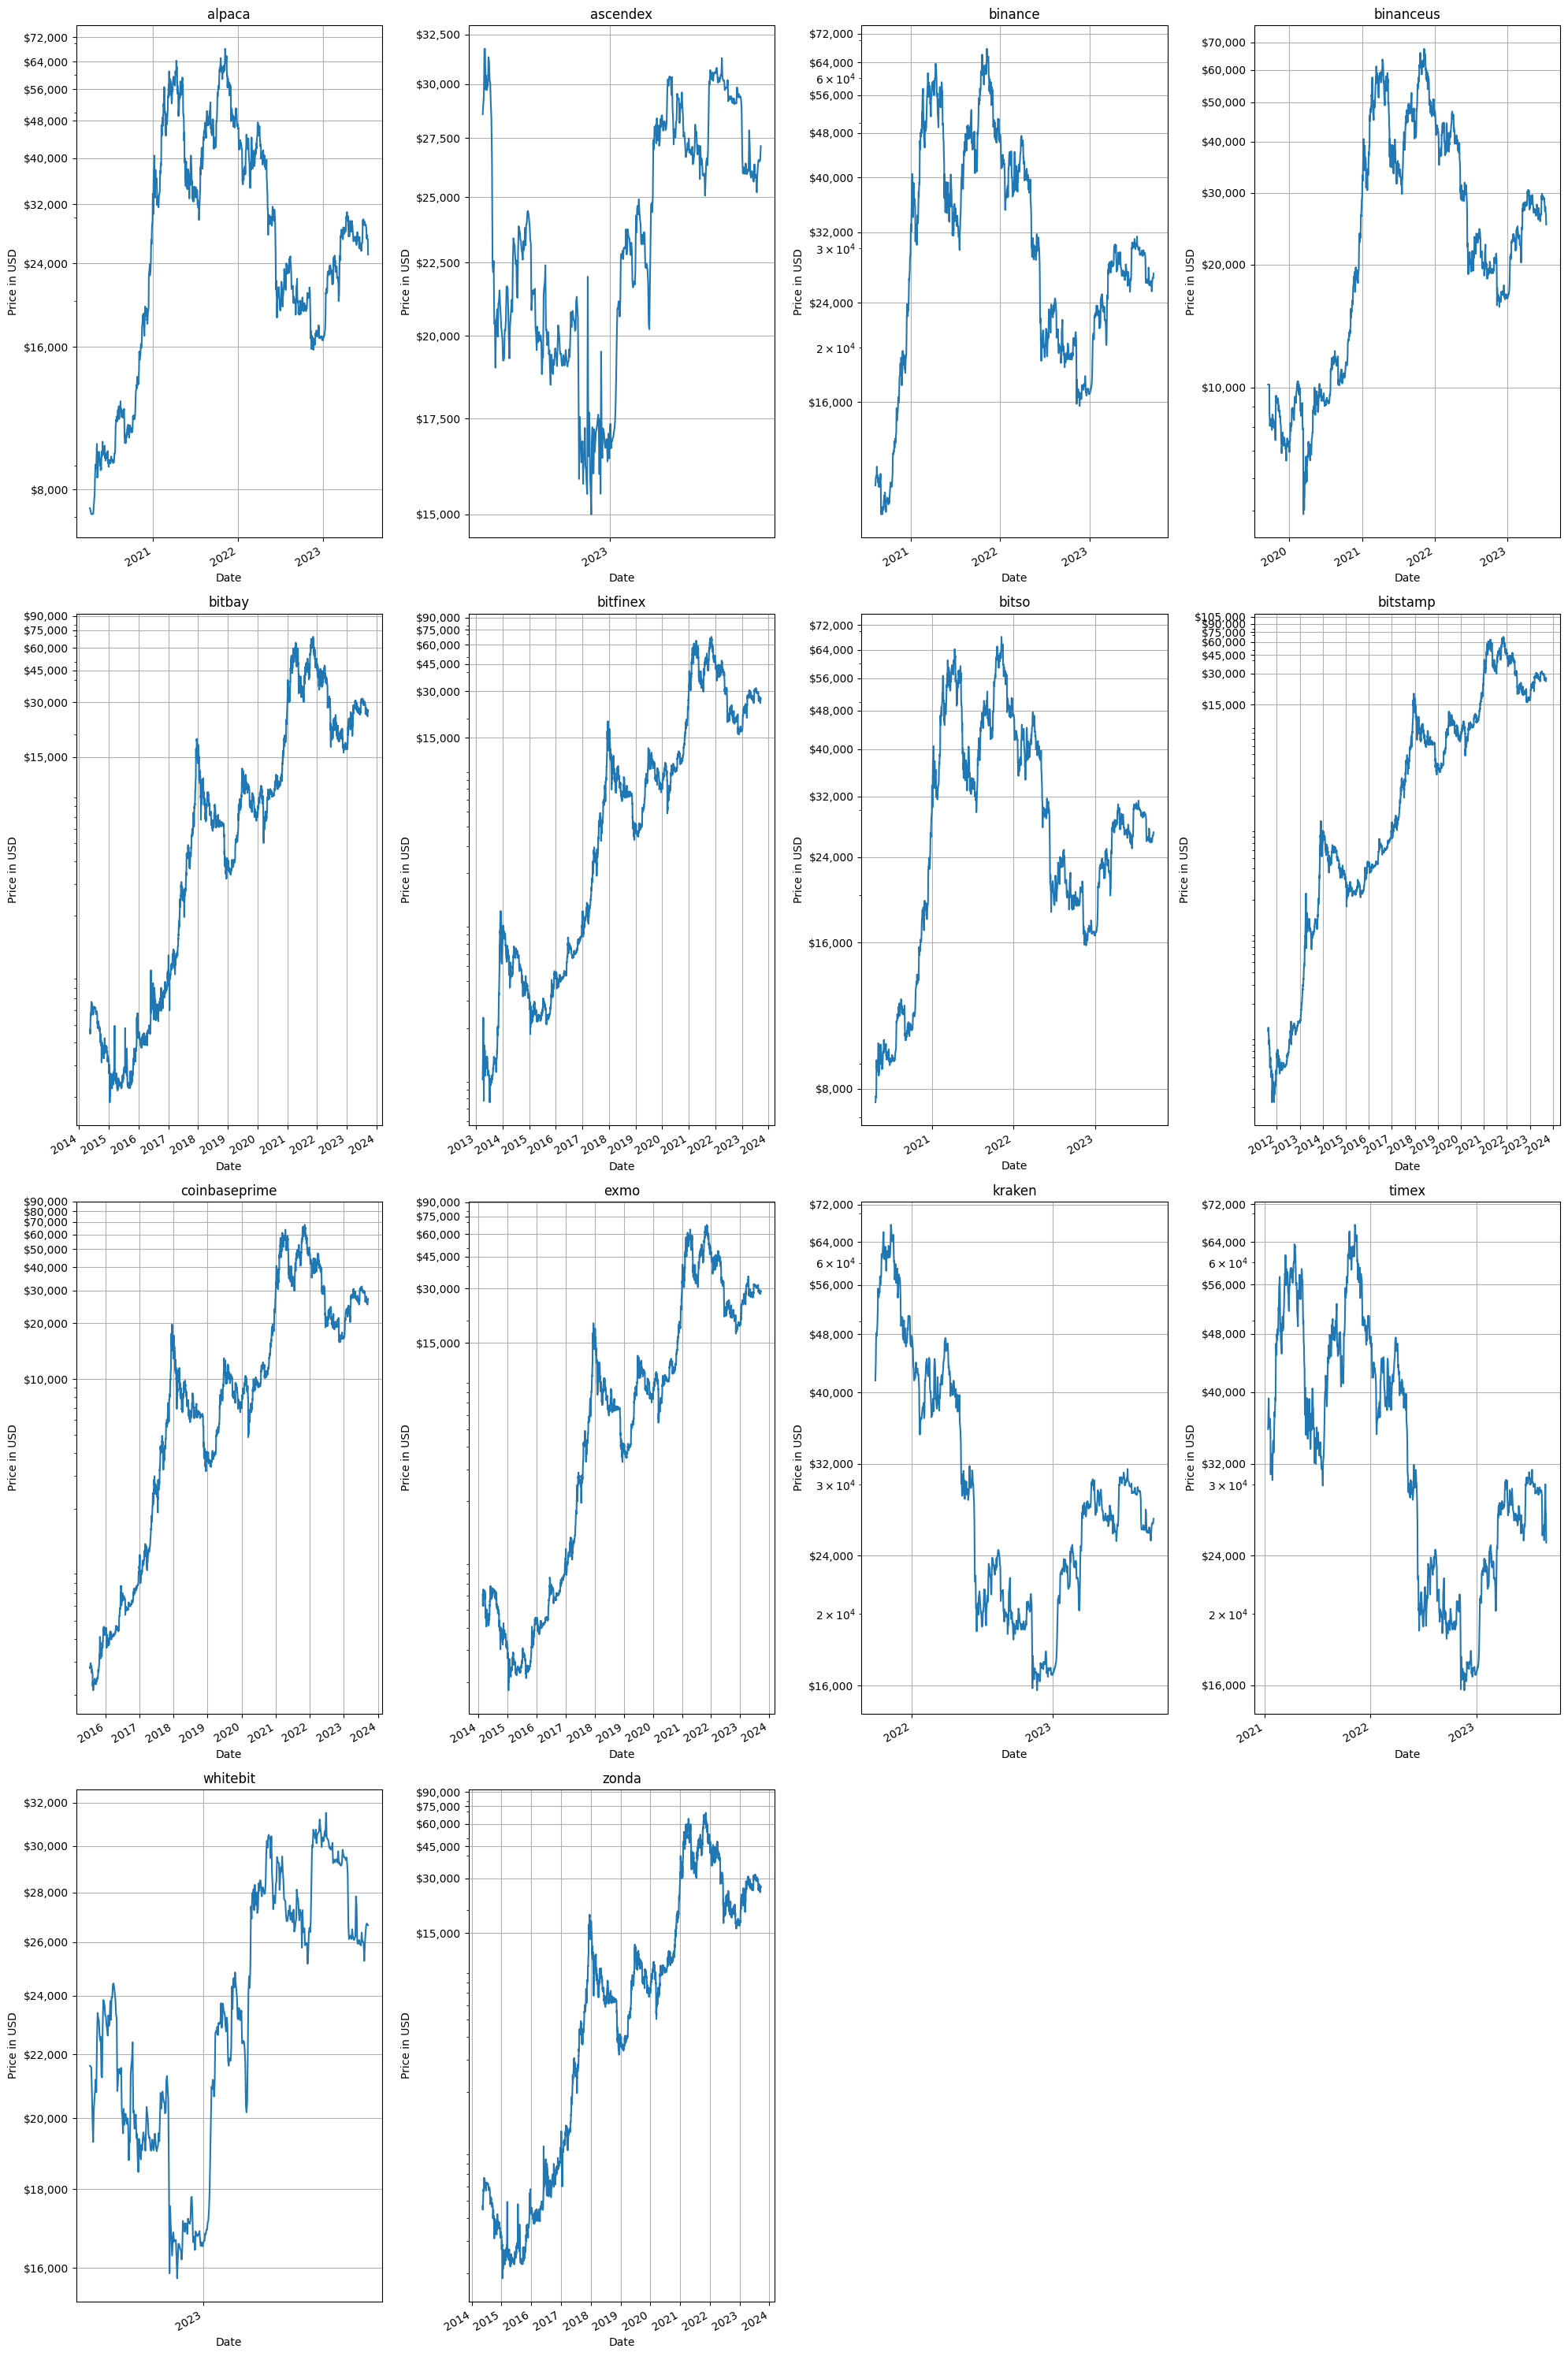

In [393]:
#Create a figure with all the exchanges as subplots, log in y axis and usd in y axis and date in x axis
fig, axs = plt.subplots(4, 4, figsize=(20, 30))
axs = axs.ravel()
for i, (k, v) in enumerate(dict_exchanges.items()):
    v["Close"].plot(ax=axs[i], logy=True, title=k)
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Price in USD")
    axs[i].grid()
    #x axis only showing the year, not the month nor the day, only like 2010, 2011, etc
    axs[i].xaxis.set_major_locator(mdates.YearLocator())

    #y axis in dollars
    axs[i].yaxis.set_major_locator(plt.MaxNLocator(9))
    #set the y axis in dollars
    axs[i].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

#hide the last plot
axs[14].set_visible(False)
axs[15].set_visible(False)

    
plt.tight_layout()
plt.show()


    

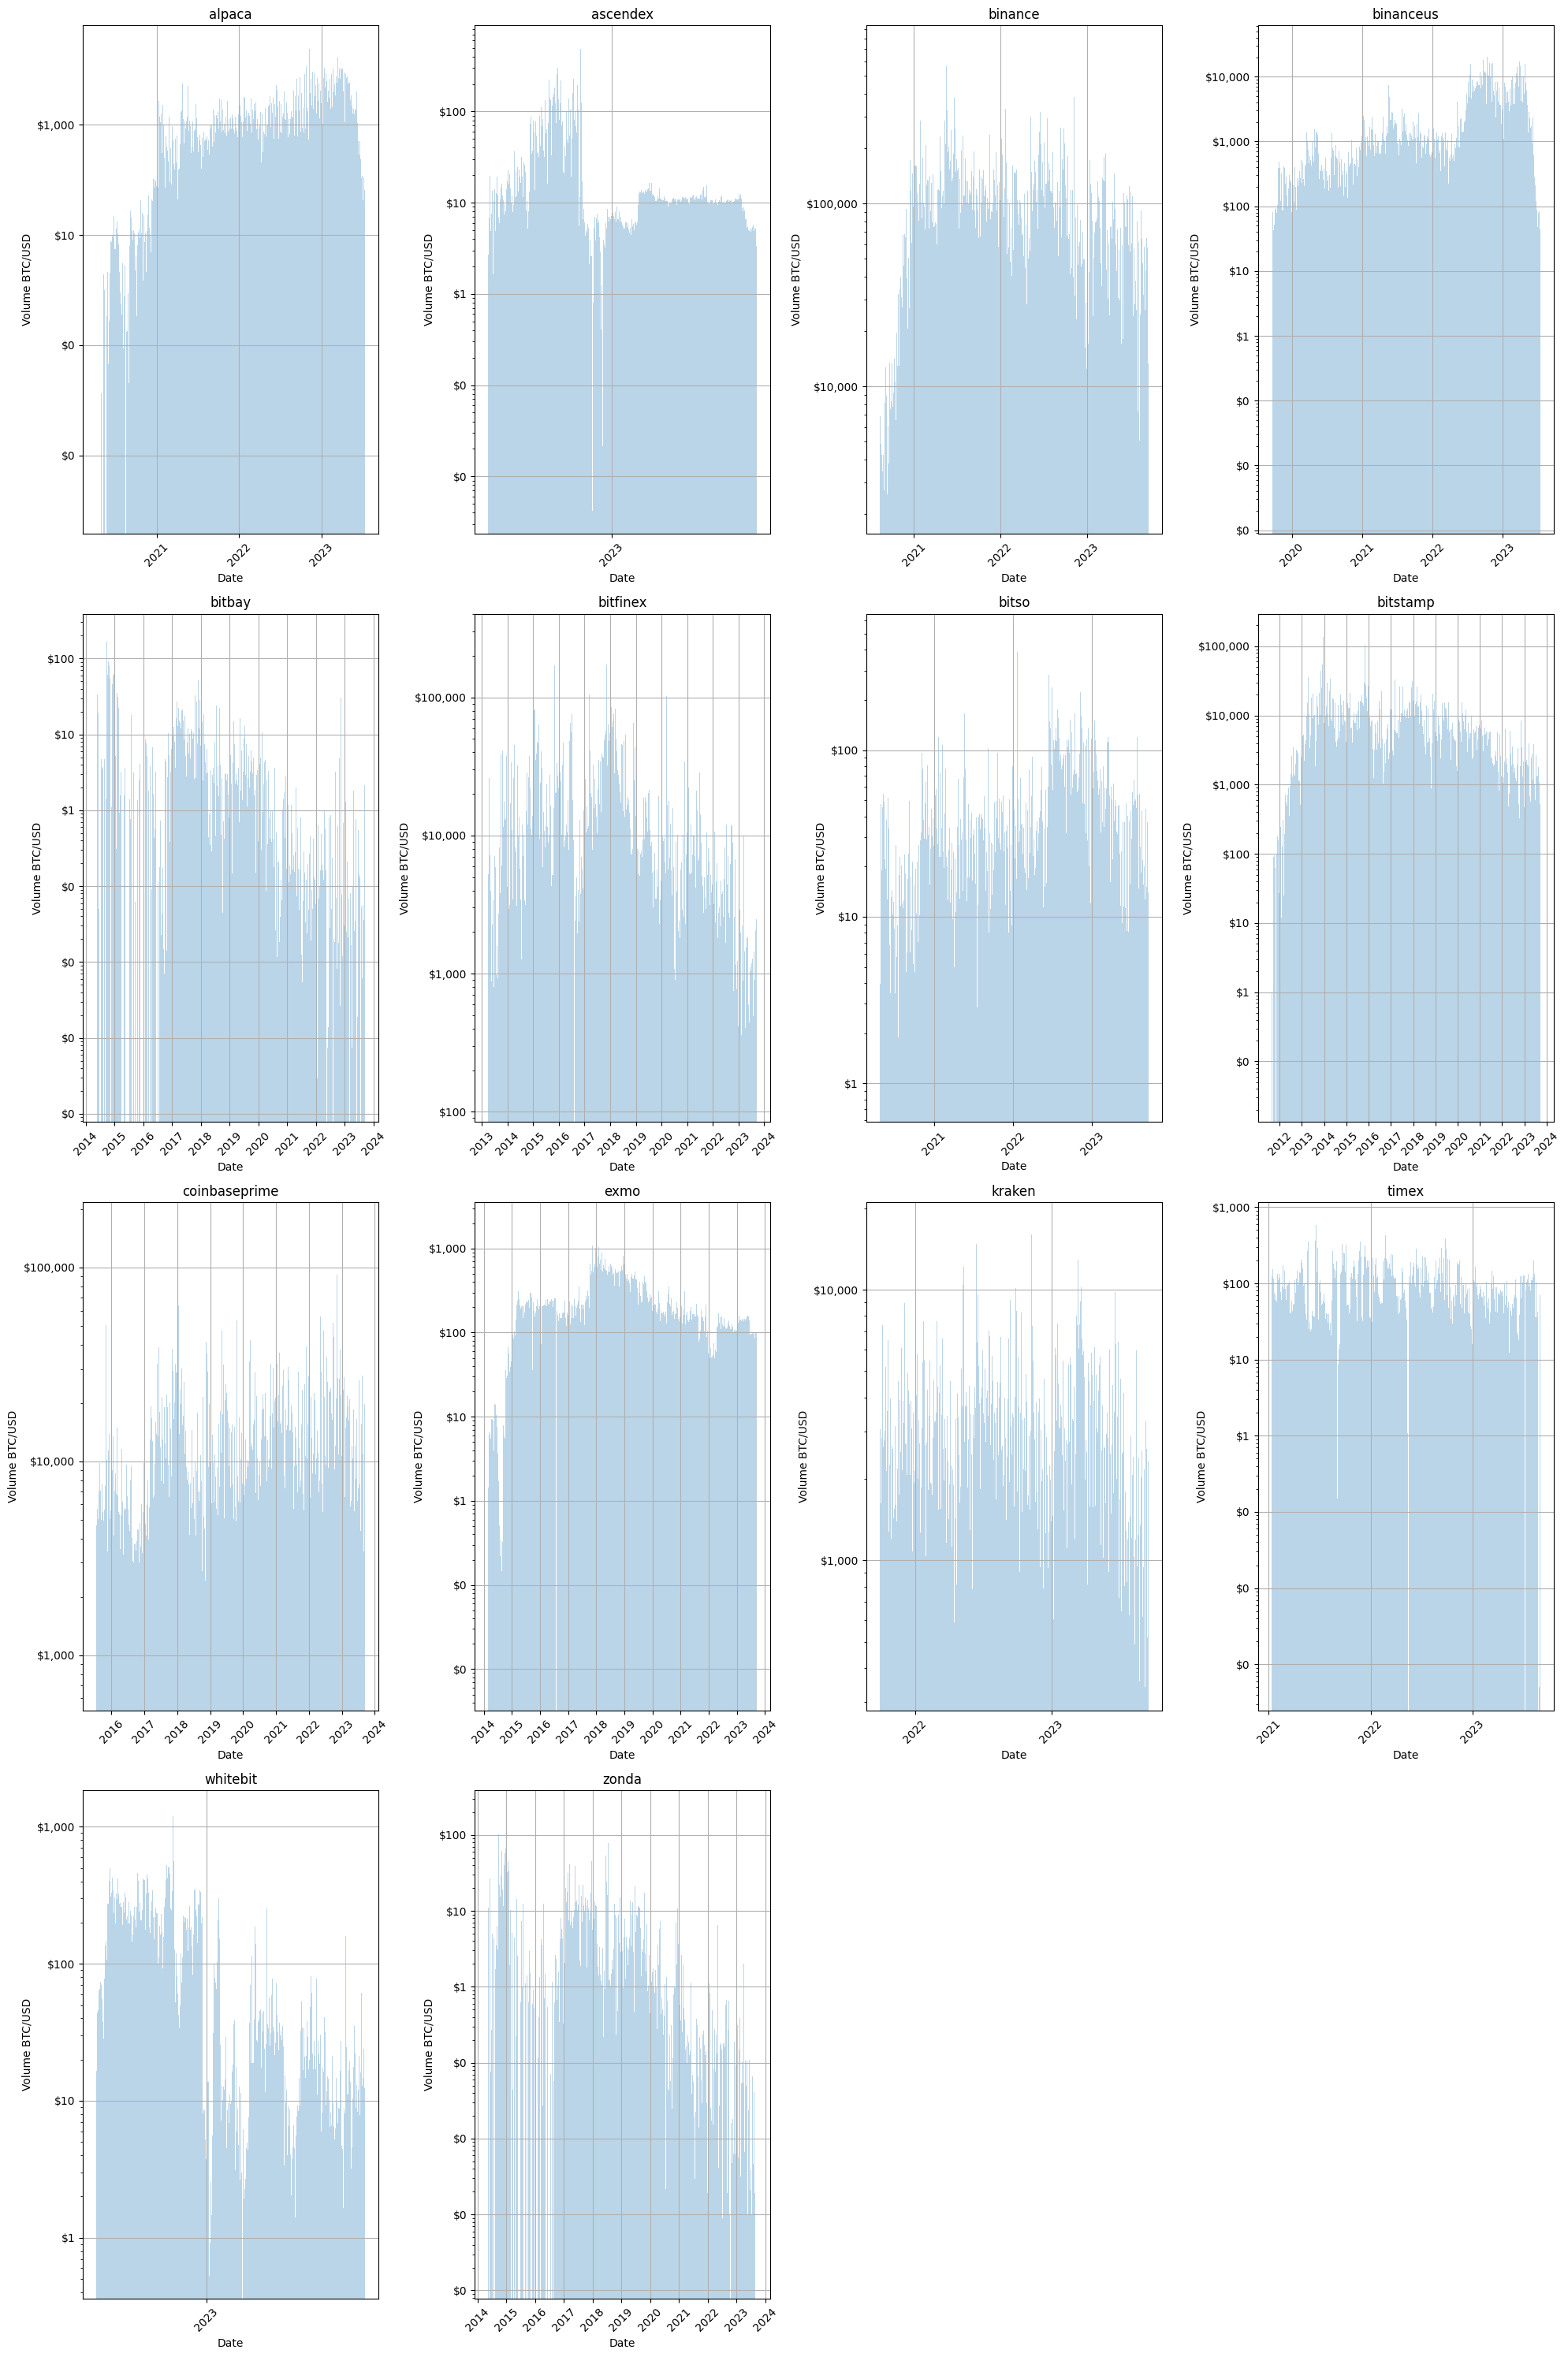

In [430]:

#Create a figure with all the exchanges as subplots, log in y axis and usd in y axis and date in x axis
fig, axs = plt.subplots(4, 4, figsize=(20, 30))
axs = axs.ravel()
for i, (k, v) in enumerate(dict_exchanges.items()):
    #title
    axs[i].set_title(k)
    axs[i].bar(v.index, v["Volume"], alpha=0.3, width=1, label="Volume")
    axs[i].set_ylabel("Volume BTC/USD")
    axs[i].set_yscale("log")
    axs[i].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
    axs[i].grid(which='major', axis='x', linestyle='-')
    axs[i].grid(which='minor', axis='x', linestyle=':')
    axs[i].grid(which='major', axis='y', linestyle='-')
    axs[i].set_xlabel("Date")
    
    #x axis only showing the year, not the month nor the day, only like 2010, 2011, etc
    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to show only years
    #axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].tick_params(axis='x', rotation=45)
    #y axis in dollars
    #axs[i].yaxis.set_major_locator(plt.MaxNLocator(5))

#hide the last plot
axs[14].set_visible(False)
axs[15].set_visible(False)

plt.tight_layout()
plt.show()


    

In [343]:
#bitstamp one of the osdest exchanges
start_dt = datetime.strptime('20111001', "%Y%m%d")
since = calendar.timegm(start_dt.utctimetuple())*1000
exchange = ccxt.bitstamp()
ex = "bitstamp"
lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/USD", timeframe="1d", since=since, limit=3000)
df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
df['Open'] = df['Open'].astype(np.float64)
df['High'] = df['High'].astype(np.float64)
df['Low'] = df['Low'].astype(np.float64)
df['Close'] = df['Close'].astype(np.float64)
df['Volume'] = df['Volume'].astype(np.float64)
df.set_index('Time', inplace=True)
print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")


mercado : 1000, 2017-03-23 21:00:00, 2019-12-17 21:00:00


# Create a Price and volume history for bitcoin since 2011

In [395]:
# open mtgox csv file /home/moises/Data_BTC_thesis/df_price_btc_usd_mtgox_buy_just_with_fees_weighted.csv"
df = pd.read_csv("/home/moises/Data_BTC_thesis/df_price_btc_usd_mtgox_buy_just_with_fees_weighted.csv", index_col=0)
df.index = pd.to_datetime(df.index)
#rename the column to Close and Volume
df.rename(columns={"Price BTC/USD": "Close", "DTVL_BTC_USD": "Volume"}, inplace=True)
df

Close        Volume
Date                                 
2011-04-01     0.778881  2.163200e+03
2011-04-02     0.788313  1.777404e+03
2011-04-03     0.781816  2.601870e+03
2011-04-04     0.706373  1.712995e+04
2011-04-05     0.673288  6.522408e+03
...                 ...           ...
2013-11-24   801.807304  2.543418e+07
2013-11-25   813.695019  2.620452e+07
2013-11-26   896.969109  3.502124e+07
2013-11-27  1002.478857  5.105905e+07
2013-11-28  1109.413036  1.823108e+07

[973 rows x 2 columns]

<AxesSubplot:xlabel='Date'>

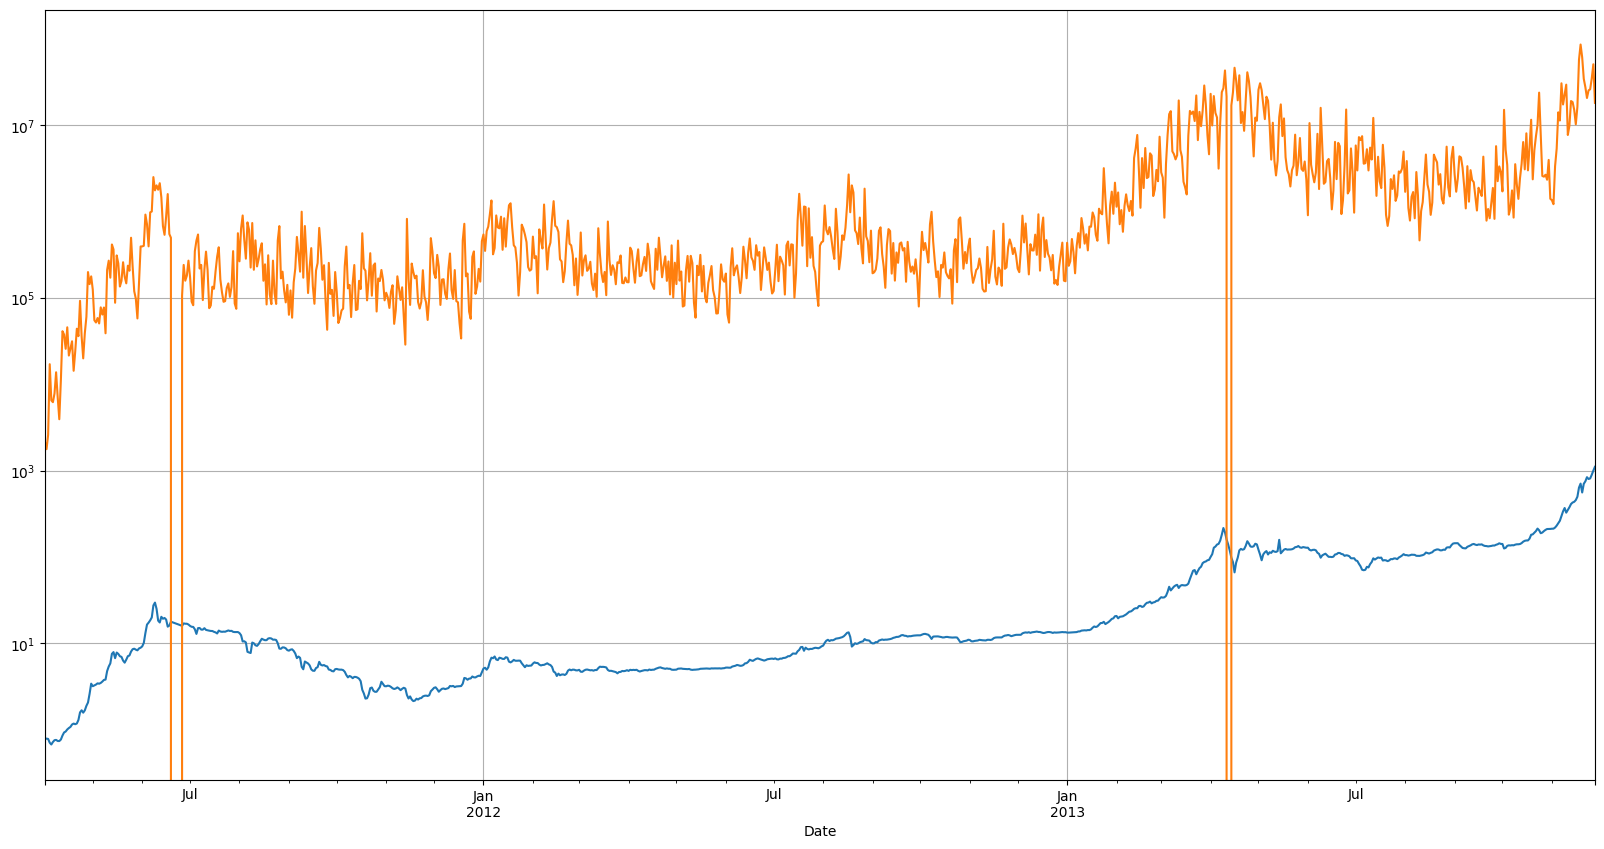

In [400]:
# inset the median value of one value after and one before of the price in the missing values
df["Close"].interpolate(method="linear", inplace=True)
df["Volume"].interpolate(method="linear", inplace=True)
df["Close"].plot(figsize=(20,10), grid=True, logy=True)
#plot the volume
df["Volume"].plot(figsize=(20,10), grid=True, logy=True)

In [401]:
dict_exchanges_with_mtgox = dict_exchanges.copy()
dict_exchanges_with_mtgox["mtgox"] = df

In [397]:
v["Volume"]

Time
2014-05-15 21:00:00    24.468436
2014-05-16 21:00:00     0.152970
2014-05-18 21:00:00    45.048499
2014-05-19 21:00:00    33.560412
2014-05-20 21:00:00    11.044952
                         ...    
2023-09-13 21:00:00     0.045263
2023-09-14 21:00:00     0.153199
2023-09-15 21:00:00     0.857940
2023-09-16 21:00:00     0.680256
2023-09-17 21:00:00     0.324936
Name: Volume, Length: 3080, dtype: float64

In [419]:
#Function that creates my data frame with the price of BTC agregated by volume

price_BTC_agreate = pd.DataFrame()
volume_BTC_agreate  = pd.DataFrame()
for i, (k, v) in enumerate(dict_exchanges_with_mtgox.items()):
    #convert the index to just date
    v.index = v.index.date
    #Create a data frame with a single column of the close values of each exchange wheited by the volume
    df_price_times_volume = pd.DataFrame(v["Close"]*v["Volume"], columns=[k])
    #inset the column in the price_BTC_agreate data frame using the index as reference
    price_BTC_agreate = price_BTC_agreate.join(df_price_times_volume, how="outer")

    
    #Create a data frame with a single column of the volume values of each exchange
    df_volume = pd.DataFrame(v["Volume"])
    volume_BTC_agreate.rename(columns={"Volume": k}, inplace=True)
    #inset the column in the volume_BTC_agreate data frame using the index as reference
    volume_BTC_agreate = volume_BTC_agreate.join(df_volume, how="outer")


price_BTC_agreate["sum"] = price_BTC_agreate.sum(axis=1)
volume_BTC_agreate["sum"] = volume_BTC_agreate.sum(axis=1)

df_price_btc_agregate = pd.DataFrame()
df_price_btc_agregate["Close"] = price_BTC_agreate["sum"]/volume_BTC_agreate["sum"]
#index to datetime
#price_BTC_agreate.index = pd.to_datetime(price_BTC_agreate.index)
#price_BTC_agreate.plot(figsize=(20,10), grid=True, logy=True)


In [424]:
df_price_btc_agregate["Close"]
#save this data frame into a csv file
df_price_btc_agregate.to_csv("/home/moises/Data_BTC_thesis/df_price_btc_usd_agregate.csv")

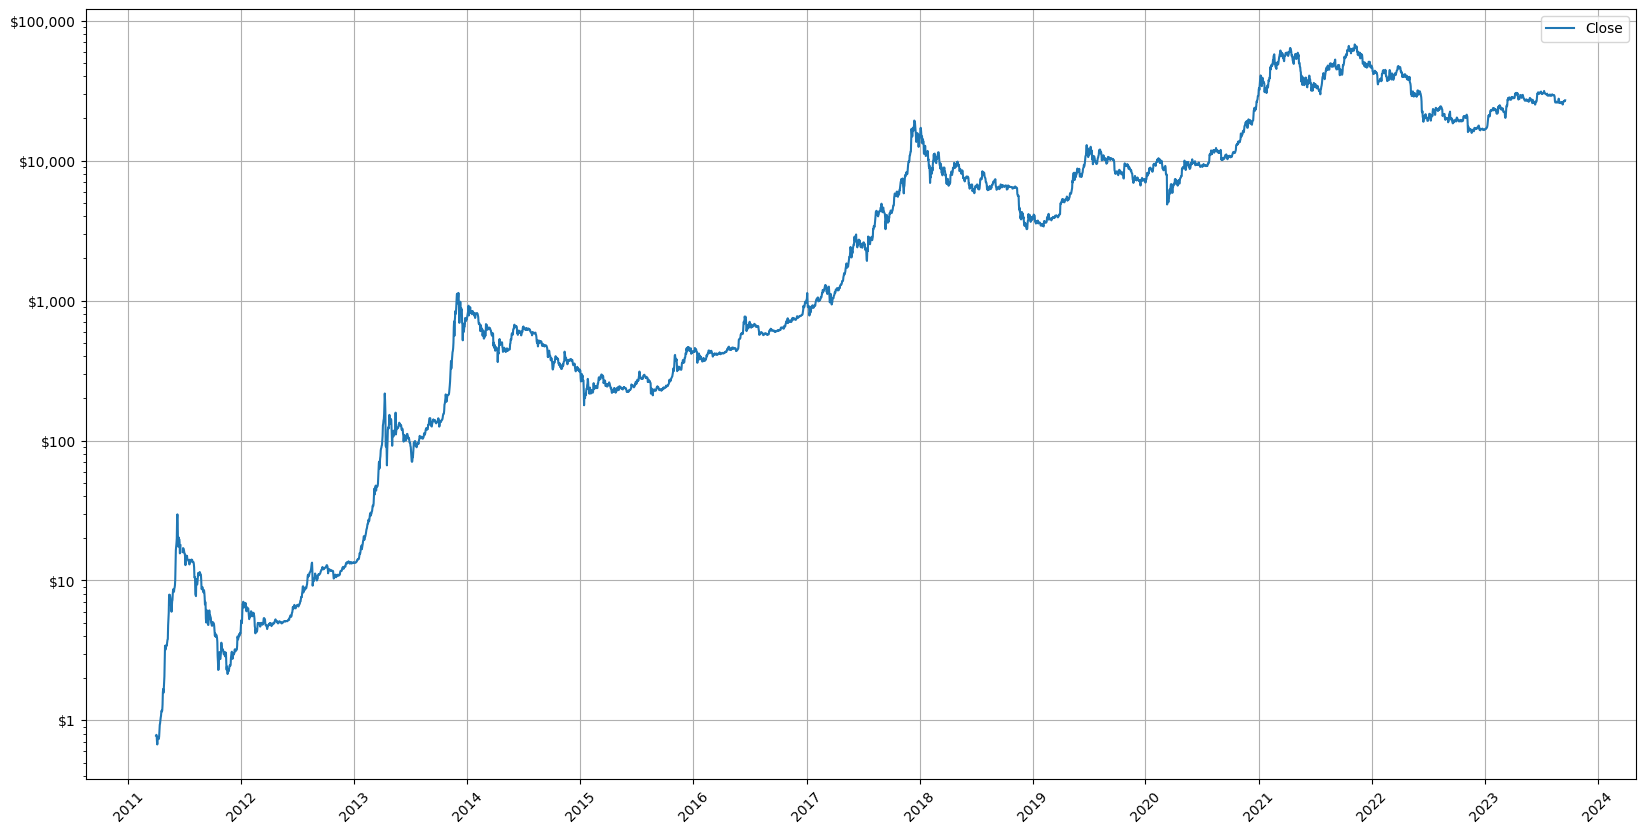

In [421]:
df_price_btc_agregate.plot(figsize=(20,10), grid=True, logy=True)
# y axis in dollars
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
#x axis only showing the year, not the month nor the day, only like 2010, 2011, etc
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to show only years
ax.tick_params(axis='x', rotation=45)
plt.show()

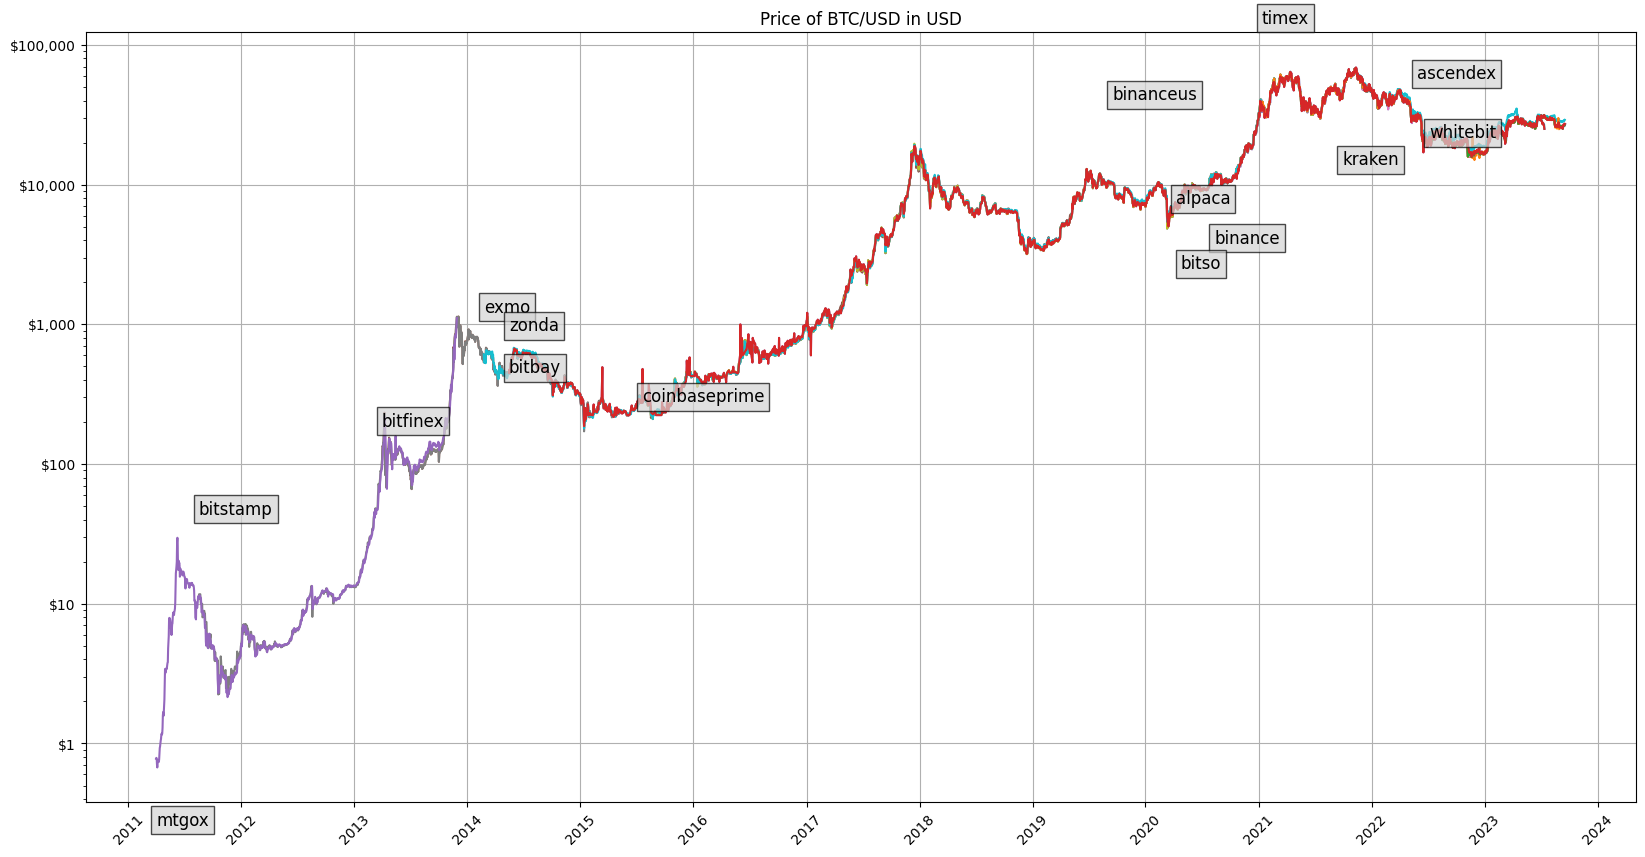

In [422]:
#iterate through the dictionary and plot the price of each exchange in the same plot
for i,(k, v) in enumerate(dict_exchanges_with_mtgox.items()):
    v["Close"].plot(figsize=(20,10), grid=True, logy=True, label=k)
    # y axis in dollars
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
    #x axis only showing the year, not the month nor the day, only like 2010, 2011, etc
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to show only years
    ax.tick_params(axis='x', rotation=45)
    #plt.legend(loc="upper left")
    #insert the name of the exchange in the plot where its first data is available
    bbox_props = dict(boxstyle="square,pad=0.3", facecolor="lightgray", alpha=0.7)

    #title
    plt.title("Price of BTC/USD in USD")
    
    m =(i%4 +1) if i%2 != 0 else 1/(i%4 +1)
    plt.text(v.index[0], v["Close"][0]*m, k, fontsize=12, bbox=bbox_props)

plt.show()

#Formula 
#wheited average mean
\begin{equation}
            \label{eq:weighted_average}
            \overline{P} = \frac{\sum_{i=1}^{n} P_i \times V_i}{\sum_{i=1}^{n} V_i}
        \end{equation}


In [427]:
# save the dict into a pickle file
# Assuming dict_exchanges_with_mtgox is your dictionary
# Save the dictionary to a pickle file
pd.to_pickle(dict_exchanges_with_mtgox, "/home/moises/Data_BTC_thesis/dict_exchanges_btc_usd_with_mtgox.pkl")

In [428]:
#open the pickle file
dict_exchanges_with_mtgox_test = pd.read_pickle("/home/moises/Data_BTC_thesis/dict_exchanges_btc_usd_with_mtgox.pkl")